# Importation des 3 fichiers

In [1]:
#On importe les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats.stats import pearsonr
warnings.filterwarnings('ignore')


In [2]:
#On importe les 3 dataframes
customers=pd.read_csv("customers.csv")
products=pd.read_csv("products.csv")
transactions=pd.read_csv("transactions.csv")

#  Vue generale des csv et merge

### Products

In [3]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [5]:
products.describe(include='all')

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1554,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


On a un -1 dans price, peux etre une erreur ou un remboursement

In [6]:
#On vérifie les catégorie des produits
temp0 =products[products.id_prod.str.startswith('0')].loc[products.categ!=0]
temp1 =products[products.id_prod.str.startswith('1')].loc[products.categ!=1]
temp2 =products[products.id_prod.str.startswith('2')].loc[products.categ!=2]

print(temp0, temp1, temp2)

Empty DataFrame
Columns: [id_prod, price, categ]
Index: [] Empty DataFrame
Columns: [id_prod, price, categ]
Index: [] Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


Les trois df temporaires sont vides : il n'y pas d'erreur de ce côté-là.

In [7]:
del temp0, temp1, temp2

### Customers

In [8]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [10]:
customers.describe(include='all')

,client_id,sex,birth
count,8623,8623,8623.000000
unique,8623,2,NaN
top,c_7385,f,NaN
freq,1,4491,NaN
mean,NaN,NaN,1978.280877
std,NaN,NaN,16.919535
min,NaN,NaN,1929.000000
25%,NaN,NaN,1966.000000
50%,NaN,NaN,1979.000000
75%,NaN,NaN,1992.000000


In [11]:
customers.sex.unique()

array(['f', 'm'], dtype=object)

### Transactions

In [12]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [14]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


### fusions des dataframes

In [15]:
df = pd.merge(transactions, customers)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679531
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
 4   sex         679532 non-null  object
 5   birth       679532 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 36.3+ MB


In [17]:
df = pd.merge(df, products, how="left")

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679532 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id_prod     679532 non-null  object 
 1   date        679532 non-null  object 
 2   session_id  679532 non-null  object 
 3   client_id   679532 non-null  object 
 4   sex         679532 non-null  object 
 5   birth       679532 non-null  int64  
 6   price       679311 non-null  float64
 7   categ       679311 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 46.7+ MB


Nous identifions des Nans pour les colonnes "Price" et "categ"

# Nettoyage du dataset

### Transformation de l'année de naissance en age 

In [19]:
# On transforme la colonne birth en colonne age, plus pratique et fonctionnelle
birth_to_age_function = lambda x : 2023-x

df.birth=birth_to_age_function(df.birth)

#On rename la colonne birth en age
df=df.rename(columns={"birth":"age"})

### Gestion des "test"

In [20]:
#On verifie le prix -1 que l'on à aperçu auparavant
df.loc[df.price== -1.0]

,id_prod,date,session_id,client_id,sex,age,price,categ
309439,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0,f,22,-1.0,0.0
309440,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0,f,22,-1.0,0.0
309441,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0,f,22,-1.0,0.0
309442,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0,f,22,-1.0,0.0
309443,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,f,22,-1.0,0.0
...,...,...,...,...,...,...,...,...
517697,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,22,-1.0,0.0
517698,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,m,22,-1.0,0.0
517699,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,22,-1.0,0.0
517700,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,m,22,-1.0,0.0


On idenifie le mot test devant chaque date, on pense a une serie de test, on va donc les retirer dans un autre dataframe avant de les supprimer

In [21]:
#On les stock dans un df appelé test
test = df.loc[df.date.str.contains("test"),:]

In [22]:
#On les suprimme du df principal
df=df[~df.date.str.contains("test")]

In [23]:
#On verifie si il reste des prix à -1.0 qui ne sont pas des test
df.loc[df.price== -1.0]
#ils n'en restent pas

,id_prod,date,session_id,client_id,sex,age,price,categ


### Verification de doublons

In [24]:
#On verifie si il y a des doublons
df[df.duplicated()]

,id_prod,date,session_id,client_id,sex,age,price,categ


pas de doublons

### Gestion des Nans

In [25]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
df.isna().sum()


 Données manquantes par colonne :



id_prod         0
date            0
session_id      0
client_id       0
sex             0
age             0
price         221
categ         221
dtype: int64

In [26]:
#On affiche les 221 lignes avec des données manquantes
pd.set_option('display.max_rows', 221)
df[df.isna().any(axis=1)]

,id_prod,date,session_id,client_id,sex,age,price,categ
893,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,55,NaN,NaN
2001,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,55,NaN,NaN
2359,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,55,NaN,NaN
6798,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,55,NaN,NaN
7368,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,55,NaN,NaN
9240,0_2245,2022-07-22 04:57:20.090378,s_241918,c_6714,f,55,NaN,NaN
21739,0_2245,2022-06-30 23:29:02.347672,s_231664,c_7790,f,40,NaN,NaN
21818,0_2245,2021-03-30 23:29:02.347672,s_13738,c_7790,f,40,NaN,NaN
22027,0_2245,2021-10-04 21:20:27.540982,s_100047,c_8138,f,39,NaN,NaN
52344,0_2245,2022-01-09 09:23:31.000720,s_147220,c_4505,m,47,NaN,NaN


Il sagit du meme produit 0_2245, qui appartient donc à la catégorie 0 au vu de son id_prod, que nous allons pouvoir rajouter, pour le prix je vais faire des recherches supplémentaires

In [27]:
#On reset l'option d'affiche de lignes augmentés
pd.reset_option('display.max_rows')

In [28]:
print("Mode categ 0.0 : " + str(df.loc[df['categ']==0.0].price.mode()))
print("Moyenne categ 0.0 : " + str(df.loc[df['categ']==0.0].price.mean()))
print("Mediane categ 0.0 : " + str(df.loc[df['categ']==0.0].price.median()))

Mode categ 0.0 : 0    4.99
dtype: float64
Moyenne categ 0.0 : 10.63818805230674
Mediane categ 0.0 : 9.99


Le mode est trop éloigné de la médiane et de la moyenne et l'écart-type est de 5 euros, ce qui, rapporté à la moyenne ou à la médiane (9.99€ et 10,63€) est assez important et m'oblige à chercher une autre méthode.  
La méthode des KNN ne marchera pas, car le tableau contient des colonnes non numériques, qui seraient utiles pour mieux imputer le prix du produit.

In [29]:
#Je remplace la catégorie NaN par 0
df.categ[df.isna().any(axis=1)]=0

In [30]:
#Imputation par la moyenne
df.fillna(df.loc[df['categ']==0.0].price.mean(), inplace=True)

In [31]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
df.isna().sum()


 Données manquantes par colonne :



id_prod       0
date          0
session_id    0
client_id     0
sex           0
age           0
price         0
categ         0
dtype: int64

### Création d'un df "commandes"

In [32]:
#On Groupby selon le numéro de transaction
df_commandes = df.groupby(['session_id', 'client_id', "age"]).agg({'date':'max',                                                                       "session_id":"count", 'price':'sum'})
df_commandes.rename(columns={'session_id':"number_items"}, inplace=True)
df_commandes = df_commandes.reset_index()
df_commandes.head()

,session_id,client_id,age,date,number_items,price
0,s_1,c_329,56,2021-03-01 00:01:07.843138,1,11.99
1,s_10,c_2218,53,2021-03-01 00:10:33.163037,1,26.99
2,s_100,c_3854,45,2021-03-01 04:43:58.025677,2,33.72
3,s_1000,c_1014,34,2021-03-03 03:25:12.320225,4,39.22
4,s_10000,c_476,34,2021-03-22 18:15:03.831240,3,41.49


### Nettoyage des colonnes "date"

In [33]:
df.head()

,id_prod,date,session_id,client_id,sex,age,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,37,4.18,0.0
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,37,3.99,0.0
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,37,13.21,0.0
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,37,19.37,0.0
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,37,8.99,0.0


In [34]:
# On séparation de "date" en deux colonnes : "date" et "time"
df[["date", "hour"]] = df.date.str.split(" ", expand=True)
df_commandes[["date", "hour"]] = df_commandes.date.str.split(" ", expand=True)

In [35]:
# On supprimme des secondes et millièmes de secondes dans "time"
df.hour = pd.to_datetime(df.hour)
df_commandes.hour = pd.to_datetime(df_commandes.hour)
df.hour = df.hour.round("H")
df.hour=df.hour.dt.hour
df_commandes.hour=df_commandes.hour.dt.hour

In [36]:
#On réorganise l'ordre des colonnes, pour plus de clarté
df=df[['id_prod', 'categ', 'price', 'client_id', 'sex', 'age', 'session_id', 'date', 'hour']]
df_commandes=df_commandes[['session_id', 'client_id', 'age','price', 'number_items', 'date', 'hour']]


In [37]:
df.head()

,id_prod,categ,price,client_id,sex,age,session_id,date,hour
0,0_1518,0.0,4.18,c_103,f,37,s_211425,2022-05-20,13
1,0_1627,0.0,3.99,c_103,f,37,s_225494,2022-06-18,6
2,0_1104,0.0,13.21,c_103,f,37,s_338755,2023-02-08,18
3,0_1390,0.0,19.37,c_103,f,37,s_23078,2021-04-20,6
4,0_1547,0.0,8.99,c_103,f,37,s_179629,2022-03-15,20


In [38]:
#On passe la colonne "date" en catégorie date
df['date']=pd.to_datetime(df['date'])

In [39]:
# On crée une colonne "day_week" pour étudier la consommation selon le jour de la semaine
df['day_week']=df['date'].dt.dayofweek
days = {0:'Lun',1:'Mar',2:'Merc',3:'Jeu',4:'Ven',5:'Sam',6:'Dim'}
df['day_week'] = df['day_week'].apply(lambda x: days[x])

In [40]:
# On fait de même pour df_commandes

df_commandes['date']=pd.to_datetime(df_commandes['date'])
df_commandes['day_week']=df_commandes['date'].dt.dayofweek
df_commandes['day_week'] = df_commandes['day_week'].apply(lambda x: days[x])

In [41]:
#On transforme aussi le type de la colonne "categ" en category, plus approprié à cette colonne
df.categ=df.categ.astype("category")

### Aperçu avant analyse

In [42]:
df.head()

,id_prod,categ,price,client_id,sex,age,session_id,date,hour,day_week
0,0_1518,0.0,4.18,c_103,f,37,s_211425,2022-05-20,13,Ven
1,0_1627,0.0,3.99,c_103,f,37,s_225494,2022-06-18,6,Sam
2,0_1104,0.0,13.21,c_103,f,37,s_338755,2023-02-08,18,Merc
3,0_1390,0.0,19.37,c_103,f,37,s_23078,2021-04-20,6,Mar
4,0_1547,0.0,8.99,c_103,f,37,s_179629,2022-03-15,20,Mar


In [43]:
#Somme des Nans par colonne
print('\n Données manquantes par colonne :\n')
df.isna().sum()


 Données manquantes par colonne :



id_prod       0
categ         0
price         0
client_id     0
sex           0
age           0
session_id    0
date          0
hour          0
day_week      0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   categ       679332 non-null  category      
 2   price       679332 non-null  float64       
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  object        
 5   age         679332 non-null  int64         
 6   session_id  679332 non-null  object        
 7   date        679332 non-null  datetime64[ns]
 8   hour        679332 non-null  int64         
 9   day_week    679332 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 52.5+ MB


In [45]:
df_commandes.head()

,session_id,client_id,age,price,number_items,date,hour,day_week
0,s_1,c_329,56,11.99,1,2021-03-01,0,Lun
1,s_10,c_2218,53,26.99,1,2021-03-01,0,Lun
2,s_100,c_3854,45,33.72,2,2021-03-01,4,Lun
3,s_1000,c_1014,34,39.22,4,2021-03-03,3,Merc
4,s_10000,c_476,34,41.49,3,2021-03-22,18,Lun


In [46]:
df_commandes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342315 entries, 0 to 342314
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   session_id    342315 non-null  object        
 1   client_id     342315 non-null  object        
 2   age           342315 non-null  int64         
 3   price         342315 non-null  float64       
 4   number_items  342315 non-null  int64         
 5   date          342315 non-null  datetime64[ns]
 6   hour          342315 non-null  int64         
 7   day_week      342315 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(3)
memory usage: 20.9+ MB


# Analyse

### Informations temporelles

In [47]:
# Informations temporelles sur mes données

df.date = pd.to_datetime(df.date)
df_commandes.date = pd.to_datetime(df_commandes.date)

print("Les données sont collectées à partir du",df.date.min(),", jusqu'au", df.date.max())
print("Ce qui fait un total de", df.date.max()-df.date.min())


Les données sont collectées à partir du 2021-03-01 00:00:00 , jusqu'au 2023-02-28 00:00:00
Ce qui fait un total de 729 days 00:00:00


## 1 - Etudes du chiffre d'affaire

### CA annuel

In [48]:
#On calcul le CA annuel

CA_2021_2023 = df.price.sum()
print("Le CA de mars 2021 à mars 2023 est de", CA_2021_2023, "€")

Le CA de mars 2021 à mars 2023 est de 11856079.719559556 €


In [49]:
#On crée une colonne 'year' dans df
df["year"]=df.date.dt.year

In [50]:
ca_years=df[["price","date"]].set_index("date").groupby(pd.Grouper(freq="Y")).sum()

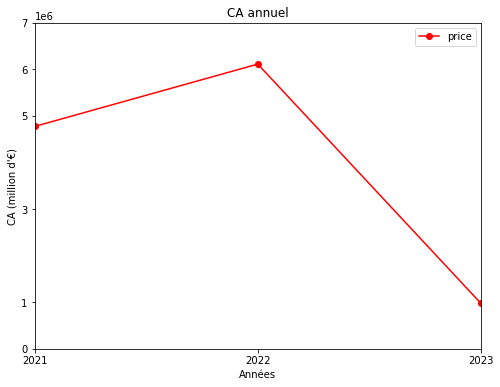

In [51]:
#On regarde l'evolution du chiffre d'affaires annuel sur les 3 années
ca_years.plot(figsize=(8,6),marker="o",color="red",yticks=(0,1000000,3000000,5000000,6000000,7000000))
plt.title("CA annuel")
plt.xlabel("Années")
plt.ylabel("CA (million d'€)")
plt.show()
#plt.savefig("CAannuel.jpg")

### CA mensuel

In [52]:
#On crée une colonne 'mois' dans df
df["month"]=df.date.dt.month

In [53]:
ca_months=df[["price","date"]].set_index("date").groupby(pd.Grouper(freq="M")).sum()

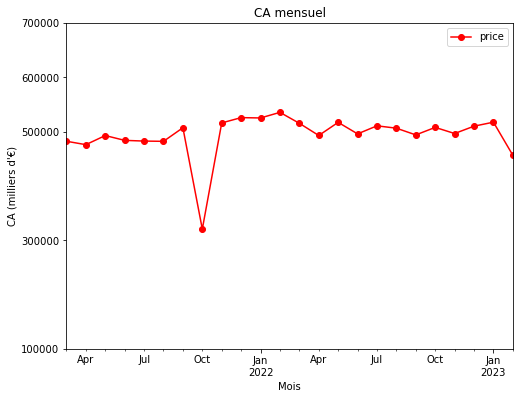

In [54]:
#On regarde l'evolution du chiffre d'affaires mensuel sur les 3 années
ca_months.plot(figsize=(8,6),marker="o",color="red",yticks=(100000,300000,500000,600000,700000))
plt.title("CA mensuel")
plt.xlabel("Mois")
plt.ylabel("CA (milliers d'€)")
plt.show()

#plt.savefig("CAmensuel.jpg")

On note une chute significative du chiffre d'affaire entre septembre et novembre 2021

### CA journalier

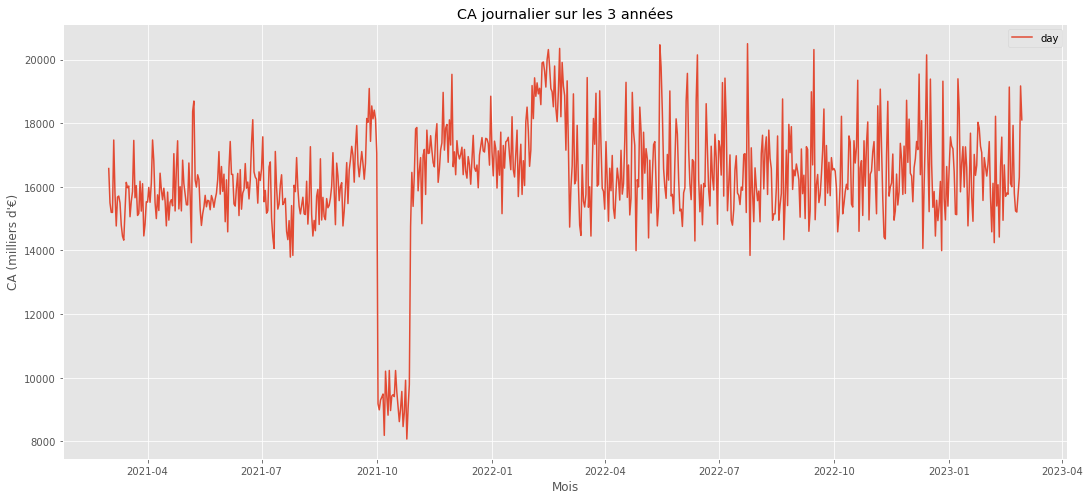

In [55]:
#On #On regarde l'evolution du chiffre d'affaires journalier sur les 3 années

df["days"]=df.date.dt.day
ca_days=df[["price","date"]].set_index("date").groupby(pd.Grouper(freq="D")).sum()

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.plot(ca_days,label= 'day')
plt.legend(loc='best')
plt.title('CA journalier sur les 3 années')
plt.xlabel("Mois")
plt.ylabel("CA (milliers d'€)")
plt.show()

#plt.savefig("CAjournalier.jpg")

C'est très dur à lire, nous allons effectuer une décomposition en moyenne mobile

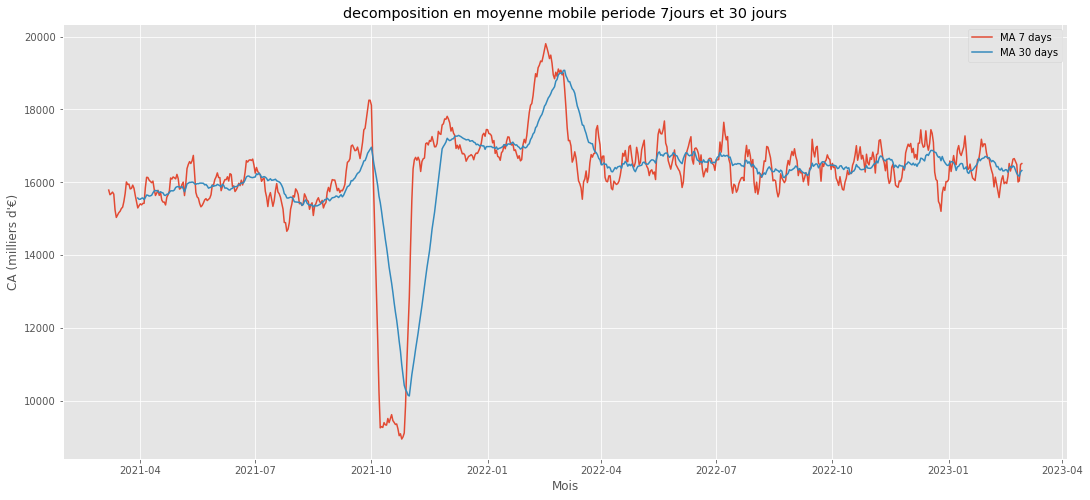

In [56]:
#On affiche une decomposition en moyenne mobile pourune periode de 7 et 30 jours

plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.plot(ca_days.rolling(7).mean(),label= 'MA 7 days')
plt.plot(ca_days.rolling(30).mean(),label= 'MA 30 days')
plt.legend(loc='best')
plt.title('decomposition en moyenne mobile periode 7jours et 30 jours')
plt.xlabel("Mois")
plt.ylabel("CA (milliers d'€)")
plt.show()

#plt.savefig("CAmoyennemobile.jpg")

### CA par catégorie

In [57]:
# On Crée un sous-df avec un groupby sur la colonne "categ"

df_categ = df.groupby(["categ"]).agg({"client_id" : 'count', "price" : "sum"})

df_categ.rename(columns={"client_id" : "total_purchases", "price" : "monetary_value"}, inplace=True)

df_categ=pd.DataFrame(df_categ)
df_categ.reset_index(inplace=True)


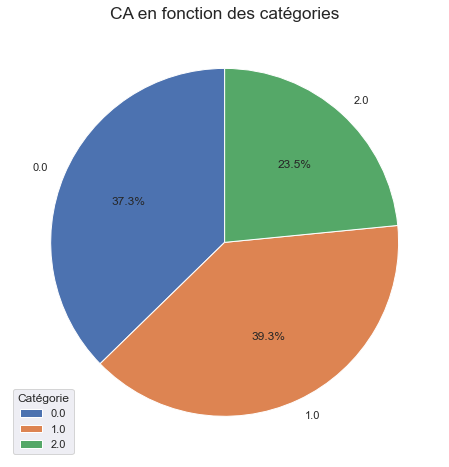

In [58]:
#On affiche le CA en fonction des catégories
sns.set()
plt.figure(figsize=(8,8))
plt.pie(df_categ.monetary_value, labels=df_categ.categ, shadow=False, startangle=90, autopct='%1.1f%%')
plt.title("CA en fonction des catégories", fontsize = 'x-large')
plt.legend(title="Catégorie")
plt.show()

#plt.savefig("CA_cat.jpeg", format="jpeg")

### CA mensuel par catégorie

In [59]:
#On affiche le CA mensuel en fonction des catégories
df_CA_cat = df.groupby(["month", "categ"]).agg({"price" : "sum"})
df_CA_cat = pd.DataFrame(df_CA_cat)
df_CA_cat.reset_index(inplace=True)

In [60]:
#On affiche les mois dans l'ordre
months = {1:'Jan', 2:'Fev', 3:'Mar', 4:'Avr', 5:'Mai', 6:'Juin', 7:'Juil', 8:'Aout', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

df_CA_cat['month'] = df_CA_cat['month'].apply(lambda x: months[x])

In [61]:
#On crée seuil entre la cétégorie 1 et 2, pour l'affichage du graphique
seuil_categ2=df_CA_cat.price.loc[df_CA_cat.categ==0.0].values + df_CA_cat.price.loc[df_CA_cat.categ==1.0].values

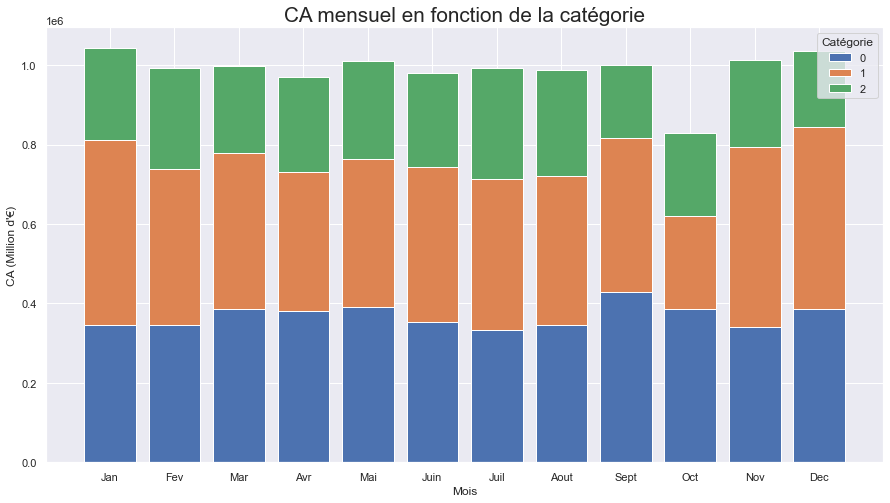

In [62]:
#On affiche le CA mensuel en focntion des catégories

plt.figure(figsize=(15,8))

plt.bar(df_CA_cat.month.loc[df_CA_cat.categ==0.0], df_CA_cat.price.loc[df_CA_cat.categ==0.0], label="0")
plt.bar(df_CA_cat.month.loc[df_CA_cat.categ==1.0], df_CA_cat.price.loc[df_CA_cat.categ==1.0], bottom=df_CA_cat.price.loc[df_CA_cat.categ==0.0], label="1")
plt.bar(df_CA_cat.month.loc[df_CA_cat.categ==2.0], df_CA_cat.price.loc[df_CA_cat.categ==2.0], bottom= seuil_categ2, label="2")

plt.legend(title="Catégorie")
plt.title("CA mensuel en fonction de la catégorie", fontsize = 'xx-large')
plt.xlabel("Mois")
plt.ylabel("CA (Million d'€)")
plt.show()


#plt.savefig("CA_mois_cat.jpeg", format="jpeg")

### CA journalier par catégorie

In [63]:
#On calcul le CA en fonction du jour de la semaine, selon les différentes catégories 

# Création d'un sous-df 
df_jour=df.groupby(['day_week', "categ"]).agg({'price':'sum'})
df_jour=pd.DataFrame(df_jour)
df_jour.reset_index(inplace=True)

#On tri les jours dans l'ordre de la semaine (sinon ils s'affichent par ordre alphabétique)
from pandas.api.types import CategoricalDtype
cat_days_order = CategoricalDtype(['Lun', 'Mar', 'Merc', 'Jeu', 'Ven', 'Sam', 'Dim'],ordered = True)
df_jour.day_week = df_jour.day_week.astype(cat_days_order)
df_jour.sort_values('day_week', inplace=True)

#On crée un seuil entre la cétégorie 1 et 2, pour l'affichage du graphique
seuil_categ2=df_jour.price.loc[df_jour.categ==0.0].values+df_jour.price.loc[df_jour.categ==1.0].values


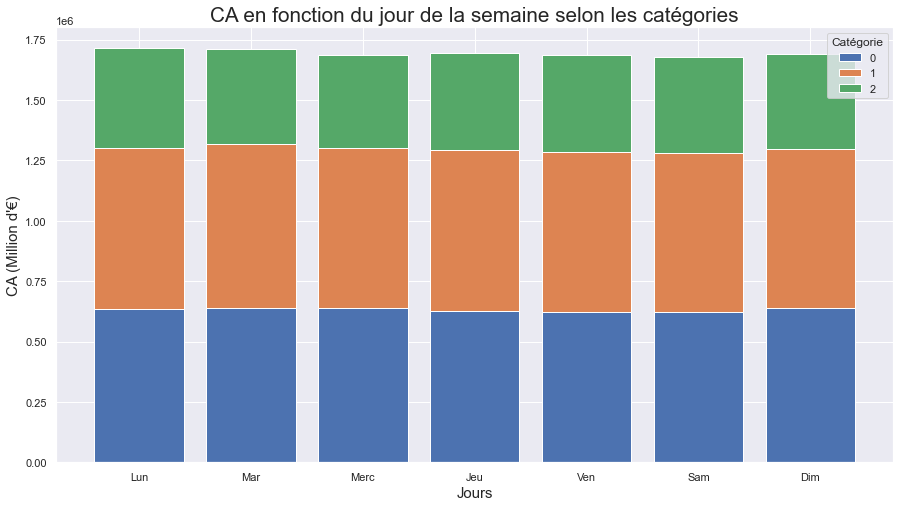

In [64]:
#On affiche le CA en fonction du jour de la semaine, selon les différentes catégories
plt.figure(figsize=(15,8))

plt.bar(df_jour.day_week.loc[df_jour.categ==0.0], df_jour.price.loc[df_jour.categ==0.0], label="0")
plt.bar(df_jour.day_week.loc[df_jour.categ==1.0], df_jour.price.loc[df_jour.categ==1.0], bottom= df_jour.price.loc[df_jour.categ==0.0], label="1")
plt.bar(df_jour.day_week.loc[df_jour.categ==2.0], df_jour.price.loc[df_jour.categ==2.0], bottom= seuil_categ2, label="2")

plt.legend(title="Catégorie")
plt.title("CA en fonction du jour de la semaine selon les catégories", fontsize = 'xx-large')
plt.xlabel("Jours", fontsize='15')
plt.ylabel("CA (Million d'€)", fontsize='15')
plt.legend(title="Catégorie", loc='best')
plt.show()


#plt.savefig("CA_semaine_cat.jpeg", format="jpeg")

### CA par heure et catégorie

In [65]:
# CA en fonction de la catégorie et de l'heure

#On fait de même pour avoir le CA en fonction de l'heure d'achat

df_heure=df.groupby(['hour', "categ"]).agg({'price':'sum'})
df_heure=pd.DataFrame(df_heure)
df_heure.reset_index(inplace=True)
seuil_categ2=df_heure.price.loc[df_heure.categ==0.0].values+df_heure.price.loc[df_heure.categ==1.0].values

# Création du seuil entre la cétégorie 1 et 2, pour l'affichage du graphique
seuil_categ2=df_heure.price.loc[df_heure.categ==0.0].values+df_heure.price.loc[df_heure.categ==1.0].values



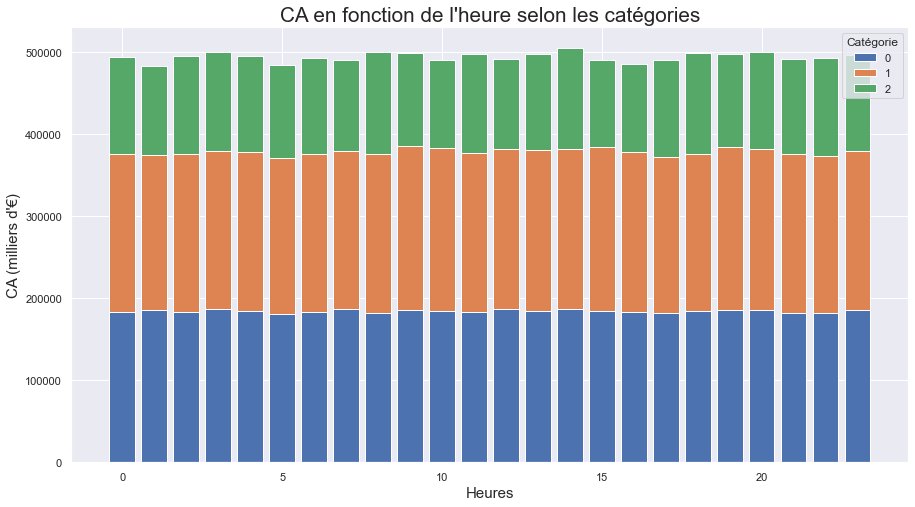

In [66]:
#On affiche le CA en focntion de la catégorie et de l'heure
plt.figure(figsize=(15,8))

plt.bar(df_heure.hour.loc[df_heure.categ==0.0], df_heure.price.loc[df_heure.categ==0.0], label="0")
plt.bar(df_heure.hour.loc[df_heure.categ==1.0], df_heure.price.loc[df_heure.categ==1.0], bottom=df_heure.price.loc[df_heure.categ==0.0], label="1")
plt.bar(df_heure.hour.loc[df_heure.categ==2.0], df_heure.price.loc[df_heure.categ==2.0], bottom= seuil_categ2, label="2")

plt.legend(title="Catégorie")
plt.title("CA en fonction de l'heure selon les catégories", fontsize = 'xx-large')
plt.xlabel("Heures", fontsize='15')
plt.ylabel("CA (milliers d'€)", fontsize='15')
plt.legend(title="Catégorie", loc='best')
plt.show()

#plt.savefig("CA_heure_cat.jpeg", format="jpeg")

# 2 - Etudes des catégories et des produits

### Analyse des catégories

--------------------
0.0
moyenne:
 10.638188052306807
médiane:
 9.99
variance:
 24.326751227950144
std(standard deviation):
 4.932215650998053


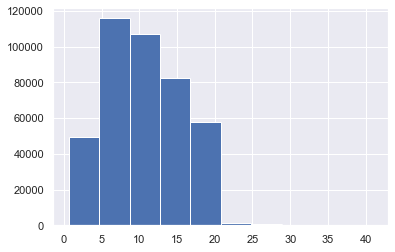

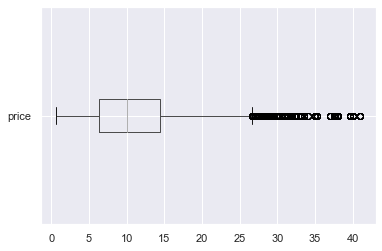

--------------------
1.0
moyenne:
 20.485729523017625
médiane:
 19.08
variance:
 57.53061032596748
std(standard deviation):
 7.584893560622158


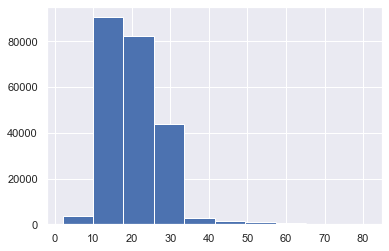

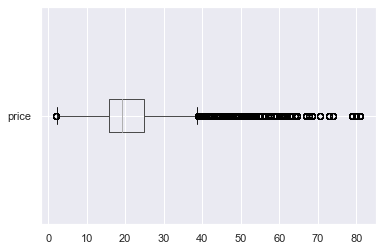

--------------------
2.0
moyenne:
 76.2074122194175
médiane:
 62.83
variance:
 1579.9841609063026
std(standard deviation):
 39.74901459038076


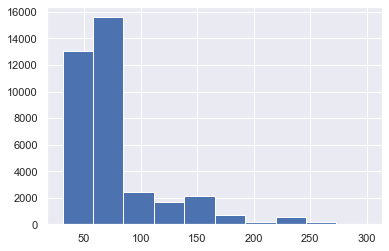

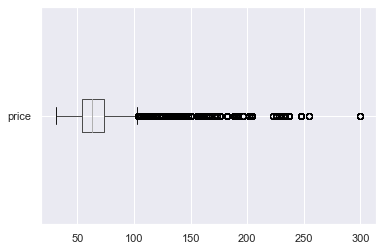

In [67]:
#On analyse par catégorie les produits en vente
for cat in df["categ"].unique():
    sous_echantillon = df[df.categ == cat]
    print("-"*20)
    print(cat)
    print("moyenne:\n",sous_echantillon["price"].mean())
    print("médiane:\n",sous_echantillon["price"].median())
    print("variance:\n",sous_echantillon["price"].var())
    print("std(standard deviation):\n",sous_echantillon["price"].std())
    sous_echantillon["price"].hist()
    plt.show()
    sous_echantillon.boxplot(column="price",vert=False)
    plt.show()

### Recherche de la baisse d'activité entre les mois de Septembre et Novembre 2021

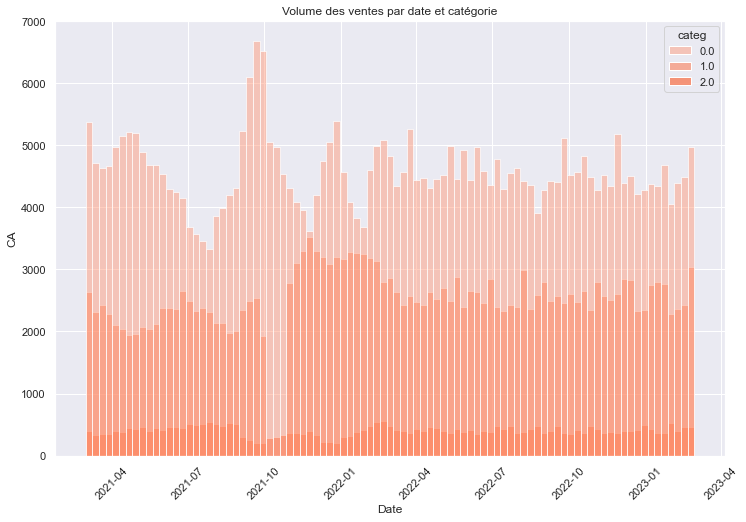

In [68]:

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='date', hue='categ', palette=["#ff9e80", "#ff6e40", "#ff3d00"])
plt.xticks(rotation=45)
plt.title('Volume des ventes par date et catégorie')
plt.xlabel("Date")
plt.ylabel("CA")
plt.show()

Text(0, 0.5, 'CA')

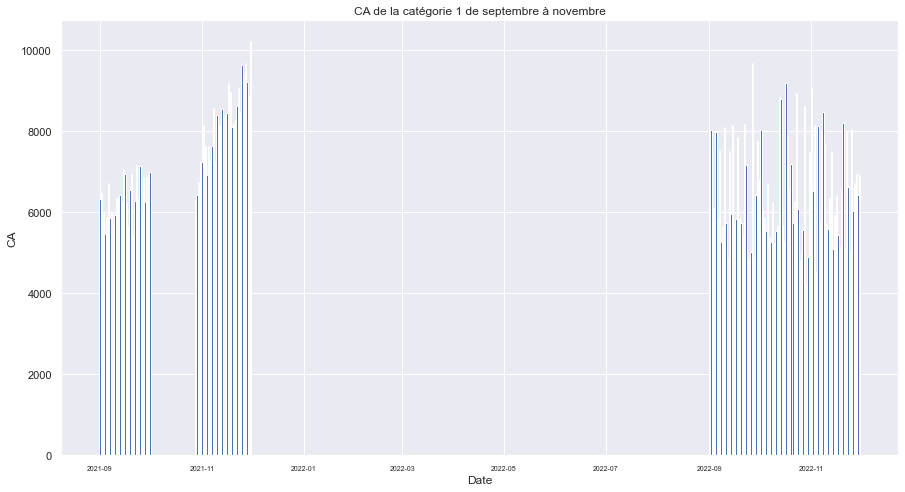

In [69]:
# Restriction à un df contenant uniquement la catégorie 1, pour les mois de septembre à novembre
# Puis étude des achats sur cette période (graphique)

df_CA_cat1 = df.loc[(df.month.isin([9, 10, 11])) & (df.categ==1.0)]
df_CA_cat1 = df_CA_cat1.groupby("date").agg({"price":"sum"})
df_CA_cat1 = pd.DataFrame(df_CA_cat1)
df_CA_cat1.reset_index(inplace=True)

plt.figure(figsize=(15,8))
plt.bar(df_CA_cat1.date, df_CA_cat1.price)
plt.xticks(fontsize=7)
plt.title("CA de la catégorie 1 de septembre à novembre")
plt.xlabel("Date")
plt.ylabel("CA")

Il semblerait y avoir aucune vente pour le mois d'octobre 2021 pour la categorie 1

In [70]:
#On recherche des dates exactes de la période problématique pour la catégorie 1

date_début = df_CA_cat1.loc[df_CA_cat1.date<"2021-10-15"].max().date
date_fin = df_CA_cat1.loc[df_CA_cat1.date>"2021-10-15"].min().date
print("Les achats de produits de catégorie 1 s'arrêtent le {} et reprennent le {}.".format(date_début, date_fin))

Les achats de produits de catégorie 1 s'arrêtent le 2021-10-01 00:00:00 et reprennent le 2021-10-28 00:00:00.


Il y a un arrêt total des achats de catégorie 1 entre le 1er et le 28 octobre, soit 27 jours vides.

Deux hypothèses s'imposent : un arrêt des ventes de catégorie 1 à ce moment, ou plus probablement un bug informatique qui a empêché d'obtenir les données de ventes qui ont bien eu lieu, d'autant plus probable que les ventes de catégorie 1 reprennent au niveau où elles s'étaient arrêtées 27 jours plus tôt.

### Analyse des Produits

In [71]:
# Création d'un df restreint
ca_produits = df.groupby(["id_prod", "price"]).agg({"price" : "sum"})

ca_produits = ca_produits.rename(columns={"price":"sum_price"})
ca_produits = pd.DataFrame(ca_produits)

ca_produits.head()

,,sum_price
id_prod,price,
0_0,3.75,4657.50
0_1,10.99,5352.13
0_10,17.95,394.90
0_100,20.60,61.80
0_1000,6.84,2954.88


### Equilibre des ventes selon les produits

In [72]:
#On prepare la courbe de Lorenz : l'équilibre des ventes selon les produits

ventes_prod = ca_produits['sum_price'].values
n = len(ventes_prod)
lorenz = np.cumsum(np.sort(ventes_prod)) / ventes_prod.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

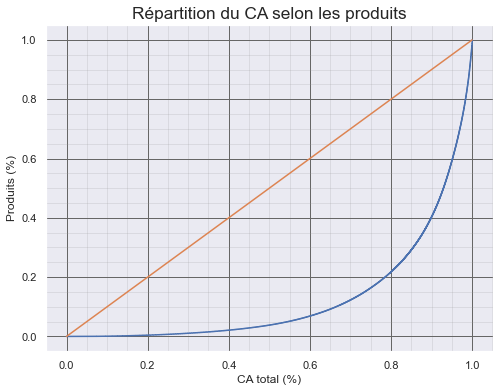

In [73]:
fig, ax = plt.subplots(1, figsize=(8, 6))
xaxis = np.linspace(0-1/n,1+1/n,n+1)
ax.plot(xaxis,lorenz,drawstyle='steps-post')
ax.plot([0,1])
plt.title("Répartition du CA selon les produits", fontsize='x-large')
plt.xlabel("CA total (%)")
plt.ylabel("Produits (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

#plt.savefig("produits.jpeg", format="jpeg")


In [74]:
# Calcul de l'indice de Gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.7428339052711839

L'indice de Gini est important, la répartition du CA selon les produits est très inégalitaire : peu de produits rapportent beaucoup, et beaucoup de produits rapportent peu.    

La loi de Pareto est respectée : 20% des produits font 80% du CA et 80% des produits font 20% du CA.

### Recherche des Top et des Flop

In [75]:
# Groupby sur les produits, j'affiche le prix et le nombre d'achats

df_prod = df.groupby('id_prod').agg({"id_prod":"count", 'price':'sum'})
df_prod.rename(columns={"id_prod":"number_purchases", "price":"monetary_value"}, inplace=True)

In [76]:
#Création de variables : les meilleurs et les pires produits en terme de CA et de nb de ventes

meilleurs_prod_montant = df_prod.sort_values(by=['monetary_value'], ascending = False).head(10)
meilleurs_prod_nb_achats = df_prod.sort_values(by=['number_purchases'], ascending = False).head(10)
pire_prod_montant = df_prod.sort_values(by=['monetary_value'], ascending = True).head(10)
pires_prod_nb_achats = df_prod.sort_values(by=['number_purchases'], ascending = True).head(10)

### Top CA par produits

In [77]:
# Affichage de ces variables

print("Les meilleurs Chiffres d'affaire par produits:\n", meilleurs_prod_montant)

Les meilleurs Chiffres d'affaire par produits:
          number_purchases  monetary_value
id_prod                                  
2_159                 650        94893.50
2_135                1005        69334.95
2_112                 968        65407.76
2_102                1027        60736.78
2_209                 814        56971.86
1_395                1875        54356.25
1_369                2252        54025.48
2_110                 865        53846.25
2_39                  915        53060.85
2_166                 228        52449.12


### Top ventes par produits

In [78]:
print("Les meilleurs nombres d'achats par produits:\n", meilleurs_prod_nb_achats)

Les meilleurs nombres d'achats par produits:
          number_purchases  monetary_value
id_prod                                  
1_369                2252        54025.48
1_417                2189        45947.11
1_414                2180        51949.40
1_498                2128        49731.36
1_425                2096        35611.04
1_403                1960        35260.40
1_412                1951        32484.15
1_413                1945        34990.55
1_406                1939        48106.59
1_407                1935        30940.65


### Flop CA par produits

In [79]:
print("Les pires Chiffres d'affaire par produits:\n", pire_prod_montant)

Les pires Chiffres d'affaire par produits:
          number_purchases  monetary_value
id_prod                                  
0_1539                  1            0.99
0_1284                  1            1.38
0_1653                  2            1.98
0_541                   1            1.99
0_807                   1            1.99
0_1601                  1            1.99
0_1728                  1            2.27
0_1498                  1            2.48
0_898                   2            2.54
0_1840                  2            2.56


### Flop ventes par produits

In [80]:
print("Les meilleurs nombres d'achats par produits:\n", pires_prod_nb_achats)

Les meilleurs nombres d'achats par produits:
          number_purchases  monetary_value
id_prod                                  
0_549                   1            2.99
0_2201                  1           20.99
2_23                    1          115.99
0_1284                  1            1.38
0_1683                  1            2.99
0_833                   1            2.99
2_98                    1          149.74
0_1633                  1           24.99
0_1601                  1            1.99
2_81                    1           86.99


### Fréquence d'achats par catégorie

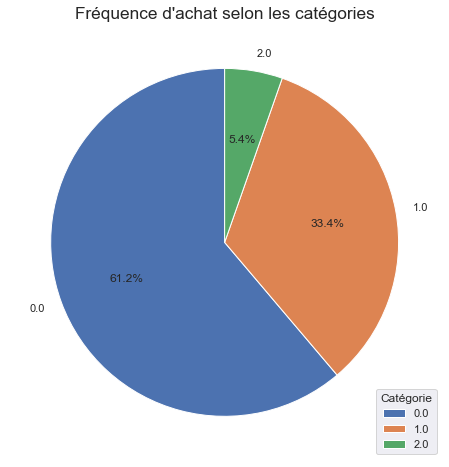

In [81]:
#On affiche la fréquence d'achat selon les catégories
plt.figure(figsize=(8,8))
plt.pie(df_categ.total_purchases, labels=df_categ.categ, shadow=False, startangle=90, autopct='%1.1f%%')
plt.title("Fréquence d'achat selon les catégories", fontsize = 'x-large')
plt.legend(title="Catégorie")
plt.show()

#plt.savefig("frequence_achat_cat.jpeg", format="jpeg")

### Prix des produits par catégorie

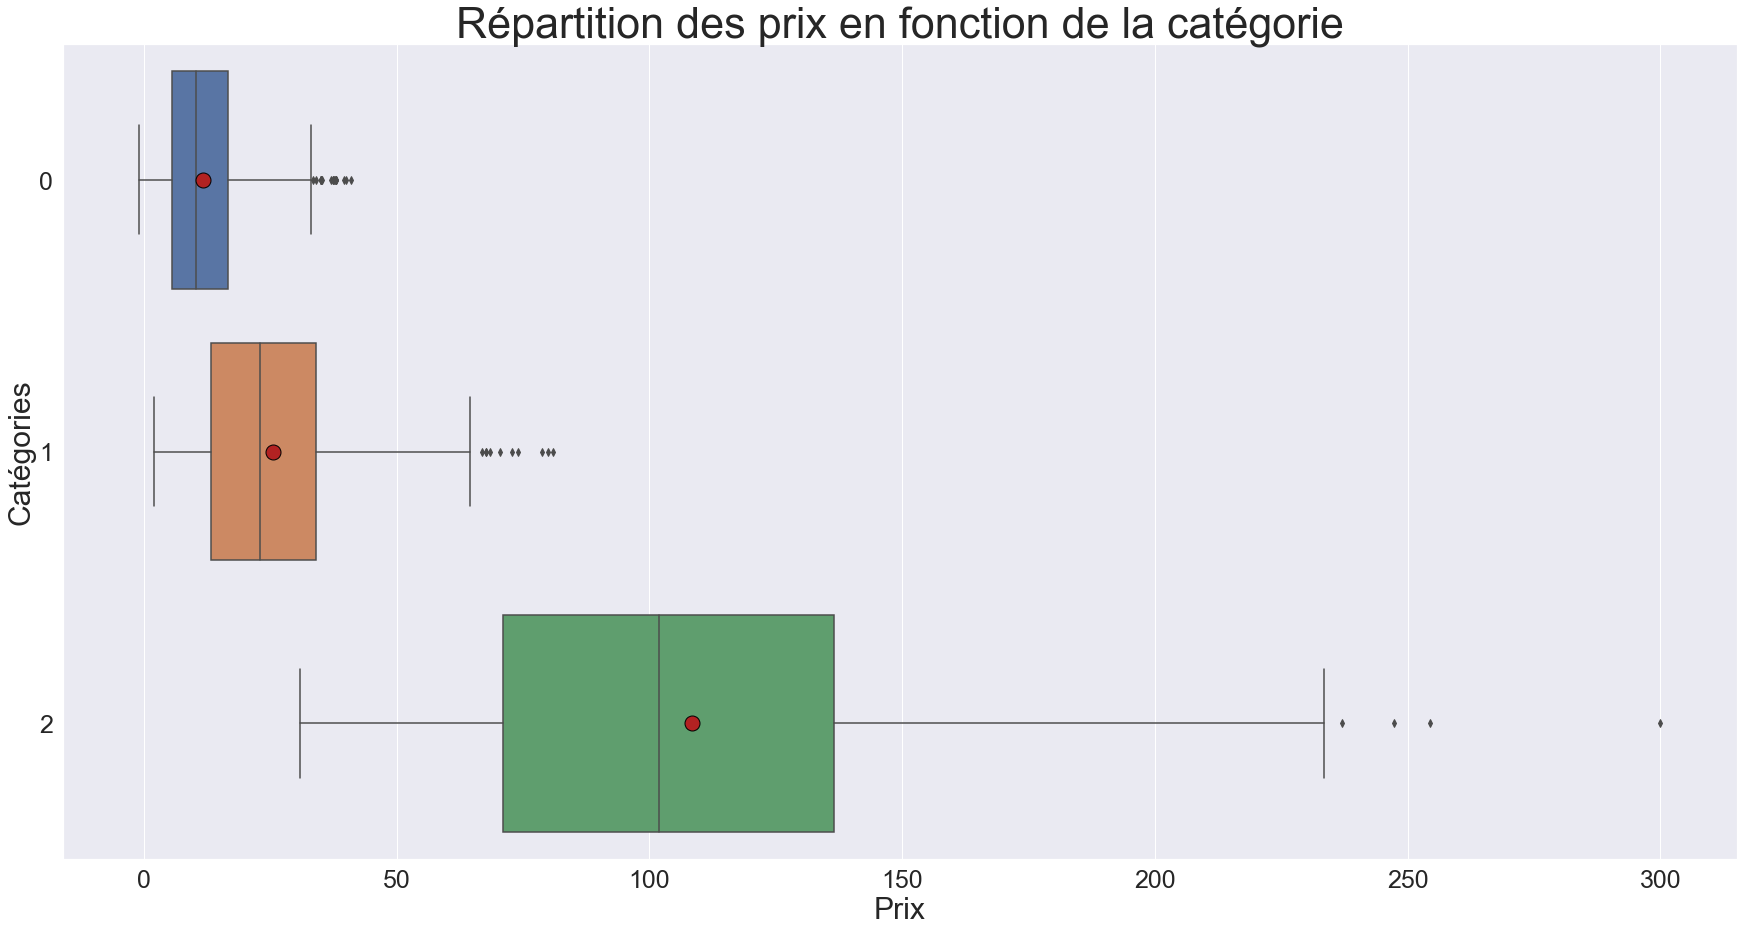

In [82]:
#On répartition les prix en fonction de la catégorie

# Je change la catégorie du df "products" en "category", pour avoir trois boxplots différents sur ma modélisation,
# sur l'axe des Y

products.categ=products.categ.astype("category")

# Représentation graphique de la moyenne
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick', "markersize":'15'}

plt.figure(figsize=(30,15))
sns.boxplot(y="categ", x="price",data=products, showmeans=True, meanprops=meanprops)
plt.title('Répartition des prix en fonction de la catégorie', fontsize='43')
plt.xlabel('Prix', fontsize='30')
plt.ylabel("Catégories", fontsize='30')
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.show()

#plt.savefig("boxplot_prix_cat", format="jpeg")

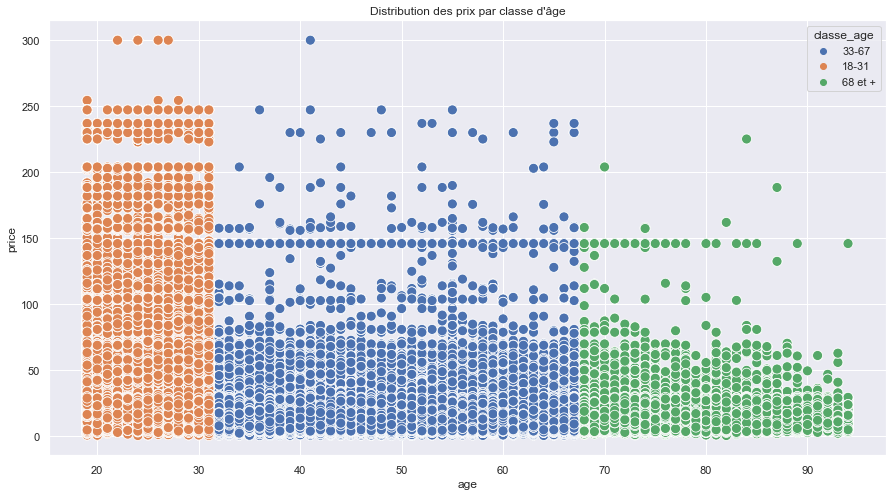

In [83]:
#On affiche la distribution des prix par tranche d'âge

df['classe_age'] = '18-31'
df['classe_age'].loc[df[df['age']>=32].index] = '33-67'
df['classe_age'].loc[df[df['age']>=68].index] = '68 et +'

plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x='age', y='price', hue='classe_age', s=100)
plt.title('Distribution des prix par classe d\'âge')
plt.show()

# 3 - Analyse des clients

### Analyse en fonction de l'age et du sexe du client

In [84]:
#On répartit en fonction de l'âge et du sexe

clients_age = df[["client_id", "age", "sex"]].groupby("client_id").max()
clients_age = pd.DataFrame(data=clients_age, columns=['age', 'sex'])
clients_age.head()

,age,sex
client_id,,
c_1,68,m
c_10,67,m
c_100,31,m
c_1000,57,f
c_1001,41,m


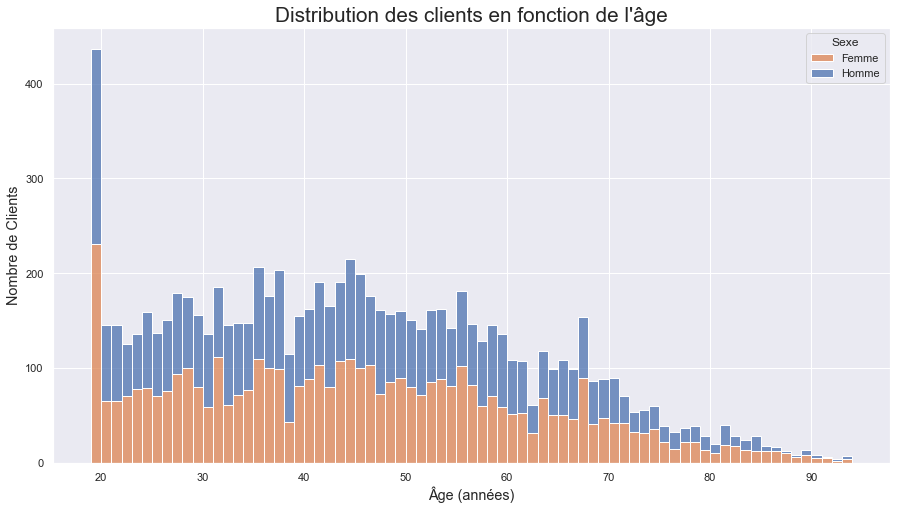

In [85]:
#On affiche un graphique en fonction de l'age et du sexe des clients
sns.set_theme(style="darkgrid")

plt.figure(figsize=(15,8))
plt.title("Distribution des clients en fonction de l'âge", fontsize='xx-large')
plt.xlabel('Âge (années)', fontsize='large')
plt.ylabel('Nombre de Clients', fontsize='large')
sns.histplot(data=clients_age, x="age", hue="sex", multiple="stack", bins=75)
plt.legend(["Femme", "Homme"], title="Sexe")
plt.show()

#plt.savefig("clients_age.jpeg", format="jpeg")


Il y a une répartition identique des clients hommes et des clients femmes en fonction de leur âge.

Les clients sont donc des hommes et des femmes dont la moitié a plus de 45 ans et l'autre moitié moins de 45 ans, avec la moitié des clients entre 35 et 55 ans environ. 

La tranche 18 ans est certainement un outlier, elle peut comprendre tous ceux qui sont trop jeunes pour commander et se sont créés un compte 18 ans, et des gens qui ne souhaitent pas donner leur âge.




In [86]:
#pip install researchpy

In [87]:
#On masque la tranche d'age 18 ans pour effectuer un test de student
df_student=df.mask(df.age==18)
import researchpy as rp
rp.ttest(group1= df_student['age'][df_student['sex']=='m'], group1_name = 'Male',
        group2= df_student['age'][df_student['sex']=='f'], group2_name = 'Female')

(   Variable         N       Mean         SD        SE  95% Conf.   Interval
 0      Male  340930.0  44.633890  13.230696  0.022659  44.589478  44.678302
 1    Female  338402.0  45.747977  13.890003  0.023877  45.701178  45.794776
 2  combined  679332.0  45.188861  13.574553  0.016470  45.156581  45.221141,
               Independent t-test      results
 0  Difference (Male - Female) =       -1.1141
 1          Degrees of freedom =   679330.0000
 2                           t =      -33.8507
 3       Two side test p value =        0.0000
 4      Difference < 0 p value =        0.0000
 5      Difference > 0 p value =        1.0000
 6                   Cohen's d =       -0.0821
 7                   Hedge's g =       -0.0821
 8               Glass's delta =       -0.0842
 9                 Pearson's r =        0.0410)

In [88]:
# On Contrôle la normalité des échantillons 'age' et 'sex'

X1 = df_student['age'][df_student['sex']=='m']

X2 = df_student['age'][df_student['sex']=='f']

from scipy.stats import shapiro

x1, pval1 = shapiro(X1)

x2, pval2 = shapiro(X2)

print(pval1)

print(pval2)

0.0
0.0


Cependant la variable age contient plus de 30 valeurs, nous allons donc approfondir

In [89]:
#On Contrôle l'égalité des variances :

# Fisher-Snedecor F-test

from scipy.stats import f

f(X1,X2)


# Anova unidirectionnelle

import scipy.stats as stats

stats.f_oneway(X1,X2)

F_onewayResult(statistic=1145.8689341395993, pvalue=5.750414307632071e-251)

In [90]:
#On Compare les deux échantillons pour voir s'ils sont significativement différents

y = stats.ttest_ind(X1,X2) ; print(y)

Ttest_indResult(statistic=-33.85068587399072, pvalue=5.750414306353666e-251)


In [91]:
#On Affiche la p-value seule

print(y[1])

5.750414306353666e-251


### Analyse en fonction des ventes par sexe et date d'achat

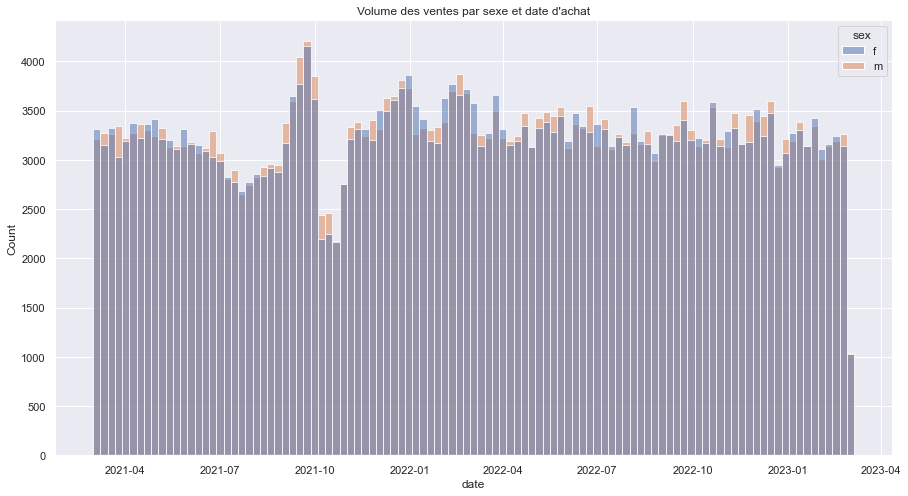

In [92]:
plt.figure(figsize=(15,8))
sns.histplot(data=df, x='date', hue='sex', binwidth=7)
plt.title('Volume des ventes par sexe et date d\'achat')
plt.show()

#plt.savefig("dateachat_sexe_clients.jpeg", format="jpeg"")

### Analyse en fonction des ventes par sexe et catégorie

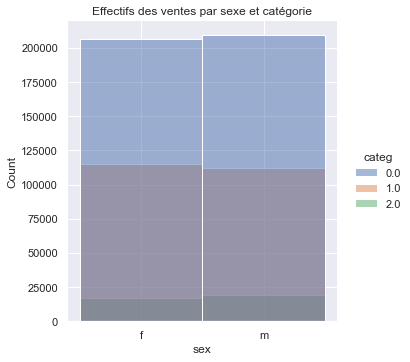

In [93]:

sns.displot(data=df, x='sex', hue='categ')
plt.title('Effectifs des ventes par sexe et catégorie')
plt.show()

#plt.savefig("vente_cat_sexe_clients.jpeg", format="jpeg"")

### Analyse de la distribution par prix et sexe

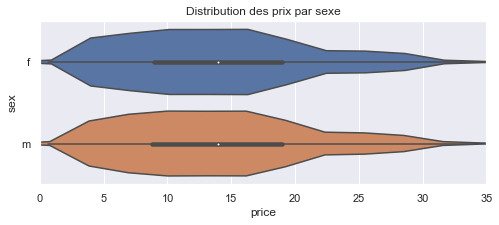

In [94]:
plt.figure(figsize=(8,3))
sns.violinplot(data=df, x='price', y='sex', showfliers=False, showmeans=True)
plt.xlim([0,35])
plt.title('Distribution des prix par sexe')
plt.show()

#plt.savefig("violon_prix_sex.jpeg", format="jpeg"")

### Meilleurs clients via calcul du score RFM

In [95]:
#On détermine qui sont mes meilleurs clients via le calcul du score RFM

# Création d'un df restreint pour le calcul du RFM
df_rfm = df_commandes[["client_id", "price", "date"]]

#On crée une date repère à partir de laquelle calculer la Récence et la Fréquence
date_repere = max(df_rfm['date']) + dt.timedelta(days=1)
print(date_repere)

2023-03-01 00:00:00


In [96]:
#On groupby pour obtenir la Récence, la Fréquence et le Montant
df_process = df_rfm.groupby(["client_id"]).agg({"date": lambda x : (date_repere-x.max()).days,"client_id" : 'count', "price" : "sum"})

df_process.rename(columns={"date": "Recency", "client_id" : "Frequency", "price" : "MonetaryValue"}, inplace=True)

df_process.head()

,Recency,Frequency,MonetaryValue
client_id,,,
c_1,45,33,558.18
c_10,33,34,1353.60
c_100,162,5,254.85
c_1000,36,93,2261.89
c_1001,6,47,1812.86


In [97]:
#On crée des listes pour R, F et M, qui leur attribuent 4 valeurs potentielles (calcul d'un RFM qui va de 1 à 4)
r_labels = range(4, 0, -1); f_labels = m_labels = range(1, 5)

#On découpe chaque colonne en quartiles, et attribution à chaque quartile d'une valeur de 1 à 4
r_groups = pd.qcut(df_process['Recency'], q=4, labels=r_labels)
f_groups = pd.qcut(df_process['Frequency'], q=4, labels=f_labels)
m_groups = pd.qcut(df_process['MonetaryValue'], q=4, labels=m_labels)

# Création des nouvelles colonnes R, F et M 
df_process = df_process.assign(R = r_groups, F = f_groups, M = m_groups)
df_rfm = pd.DataFrame(data=df_process)
df_rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M
client_id,,,,,,
c_1,45,33,558.18,1,3,2
c_10,33,34,1353.60,2,3,3
c_100,162,5,254.85,1,1,1
c_1000,36,93,2261.89,2,4,4
c_1001,6,47,1812.86,4,3,4


In [98]:
#On calcul le score RFM
df_rfm['RFM_Score'] = df_rfm[['R','F','M']].sum(axis=1)
df_rfm['RFM_Score'].head()

client_id
c_1        6
c_10       8
c_100      3
c_1000    10
c_1001    11
Name: RFM_Score, dtype: int64

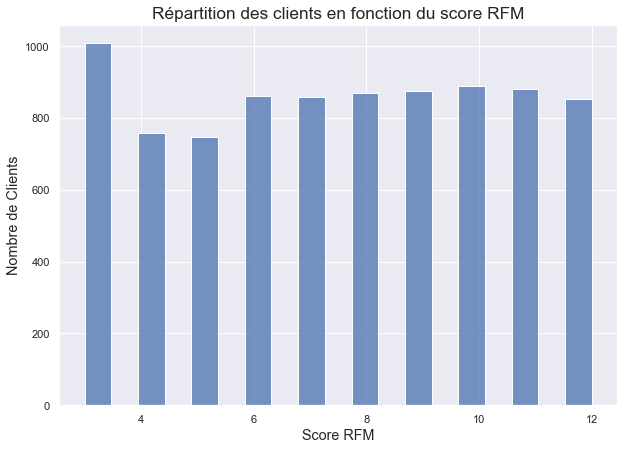

In [99]:
#On affiche un graphique des clients en fonction du score RFM
plt.figure(figsize=(10,7))
sns.histplot(df_rfm['RFM_Score'])
plt.title('Répartition des clients en fonction du score RFM', fontsize='x-large')
plt.xlabel('Score RFM', fontsize='large')
plt.ylabel('Nombre de Clients', fontsize='large')
plt.show()

#plt.savefig("clients_RFM.jpeg", format="jpeg")


### Meilleurs clients par montant total d'achat

In [100]:
#On affiche les 10 meilleurs clients selon le montant total


# Je classe les clients en fonction du Montant total des achats (et je vérifie que leur score RFM est normal, ce
# que j'estime ici comme étant supérieur à 8)

meilleurs_clients = df_process.sort_values(by=['MonetaryValue'], ascending = False)
meilleurs_clients = meilleurs_clients.head(10)

#On merge pour obtenir les informations sur ces clients
meilleurs_clients = pd.merge(meilleurs_clients, customers, left_on="client_id", right_on="client_id")

#On transforme la colonne birth en colonne age
birth_to_age_function = lambda x : 2022-x
meilleurs_clients.birth=birth_to_age_function(meilleurs_clients.birth)
meilleurs_clients=meilleurs_clients.rename(columns={"birth":"age"})

meilleurs_clients

,client_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,sex,age
0,c_1609,1,10997,324033.350000,4,4,4,12,m,42
1,c_4958,1,3851,289760.340000,4,4,4,12,m,23
2,c_6714,1,2620,153662.749128,4,4,4,12,f,54
3,c_3454,1,5573,113669.844564,4,4,4,12,m,53
4,c_3263,3,143,5276.870000,4,4,4,12,f,37
5,c_1570,8,158,5271.620000,3,4,4,11,f,43
6,c_2899,8,69,5214.050000,3,4,4,11,f,28
7,c_2140,1,147,5208.820000,4,4,4,12,f,45
8,c_7319,3,145,5155.770000,4,4,4,12,f,48
9,c_8026,3,146,5093.218188,4,4,4,12,m,44


### Meilleurs clients selon la fréquence d'achat

In [101]:
#On affiche les 10 meilleurs clients selon la fréquence d'achat

meilleurs_clients_freq = df_process.sort_values(by=['Frequency'], ascending = False)
meilleurs_clients_freq = meilleurs_clients_freq.head(10)
meilleurs_clients_freq

#On merge pour obtenir les informations sur ces clients
meilleurs_clients_freq = pd.merge(meilleurs_clients_freq, customers, left_on="client_id", right_on="client_id")

#On transforme la colonne birth en colonne age
meilleurs_clients_freq.birth=birth_to_age_function(meilleurs_clients_freq.birth)
meilleurs_clients_freq=meilleurs_clients_freq.rename(columns={"birth":"age"})

meilleurs_clients_freq


,client_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score,sex,age
0,c_1609,1,10997,324033.350000,4,4,4,12,m,42
1,c_3454,1,5573,113669.844564,4,4,4,12,m,53
2,c_4958,1,3851,289760.340000,4,4,4,12,m,23
3,c_6714,1,2620,153662.749128,4,4,4,12,f,54
4,c_8526,8,165,3975.060000,3,4,4,11,f,57
5,c_1637,5,164,4698.870000,4,4,4,12,f,34
6,c_669,3,163,4499.360000,4,4,4,12,m,34
7,c_2265,1,163,3271.280000,4,4,4,12,m,54
8,c_682,1,161,4102.180000,4,4,4,12,f,48
9,c_8510,4,161,4798.630000,4,4,4,12,m,31


Je constate que mes quatre premiers clients ont fait plus de trois achats par jour en moyenne, ce qui me laisse supposer qu'il ne s'agit pas de clients classiques, mais probablement d'entreprises, peut-être de bibliothèques. 

Je cherche des informations complémentaires sur ces clients

### Analyse des 4 meilleurs clients

In [102]:
#On Crée une variable avec les quatre meilleurs clients
clients_verif = meilleurs_clients.head(4).client_id.to_list() 

#On sélectionne 100 lignes au hasard parmi les achats de ces quatre clients
df[df.client_id.isin(clients_verif)].sample(n=100)
 

,id_prod,categ,price,client_id,sex,age,session_id,date,hour,day_week,year,month,days,classe_age
3520,1_543,1.0,51.99,c_6714,f,55,s_312532,2022-12-15,18,Jeu,2022,12,15,33-67
13893,2_32,2.0,55.79,c_4958,m,24,s_66126,2021-07-23,14,Ven,2021,7,23,18-31
26883,0_1185,0.0,5.99,c_1609,m,43,s_325875,2023-01-12,16,Jeu,2023,1,12,33-67
28444,0_1457,0.0,11.99,c_1609,m,43,s_238516,2022-07-15,2,Ven,2022,7,15,33-67
42339,1_389,1.0,24.99,c_1609,m,43,s_168394,2022-02-21,1,Lun,2022,2,21,33-67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35461,0_1493,0.0,14.99,c_1609,m,43,s_296605,2022-11-12,20,Sam,2022,11,12,33-67
8166,0_989,0.0,18.99,c_6714,f,55,s_29575,2021-05-04,2,Mar,2021,5,4,33-67
36306,1_425,1.0,16.99,c_1609,m,43,s_52026,2021-06-22,4,Mar,2021,6,22,33-67
16059,2_1,2.0,56.99,c_4958,m,24,s_226529,2022-06-20,9,Lun,2022,6,20,18-31


 On ne constate rien d'anormal ce sont très certainement des entreprises. On garde donc ces clients tels quels pour l'analyse de données, on les concidèrera comme outliers pour certaine analyse.

### Répartion du CA en fonction des clients

In [103]:

#On prepare une courbe de Lorenz : la répartition du CA en fonction des clients

clients_temp = df_process.MonetaryValue.values
n = len(clients_temp)
lorenz = np.cumsum(np.sort(clients_temp)) / clients_temp.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0


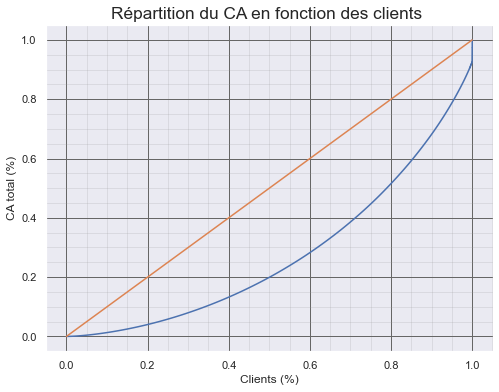

In [104]:
#On affiche une courbe de Lorenz : la répartition du CA en fonction des clients

fig, ax = plt.subplots(1, figsize=(8, 6))
xaxis = np.linspace(0-1/n,1+1/n,n+1)
ax.plot(xaxis,lorenz,drawstyle='steps-post')
ax.plot([0,1])
plt.title("Répartition du CA en fonction des clients ", fontsize='x-large')
plt.xlabel("Clients (%)")
plt.ylabel("CA total (%)")
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

#plt.savefig("CA_clients_lorenz.jpeg", format="jpeg")

In [105]:
#On calcul l'indice de Gini

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n
S = 0.5 - AUC # surface entre la première bissectrice et la courbe de Lorenz
gini = 2*S
gini

0.4463955226980708

L'indice de Gini est moyen, légèrement inférieur à 0,50. La répartition du CA en fonction des clients n'est pas préoccupante. 

J'observe que la loi de Pareto n'est pas respectée : 50% des clients font 20% du CA, et 50% font 80% du CA. 

J'observe aussi que la fin de la courbe est verticale : cela correspond aux 4 meilleurs clients, qui représentent un gros montant du CA (outliers).

# 3 - Correlations

### Correlation sexe des clients par catégorie de produits

In [106]:
#On masque les quatre outliers rencontrés en (plus gros montant), et les valeurs qui ont pour âge "18" qui ne sont pas repésentatif (outliers)
df=df.mask(df.client_id.isin(clients_verif))
df=df.mask(df.age==18)

df_commandes=df_commandes.mask(df_commandes.client_id.isin(clients_verif))
df_commandes=df_commandes.mask(df_commandes.age==18)


In [107]:
#Corrélation sexe des clients / catégorie de produits achetés

#qualitatif/ qualitatif

# Tableau de contingence réel
df.categ=df.categ.astype("float64")

X="categ"
Y="sex"
cs=df[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
cs.head()

sex,f,m
categ,,
0.0,200904,186589
1.0,111331,101017
2.0,16980,15868


In [108]:
cont=cs.copy()
tx=df[X].value_counts()
ty=df[Y].value_counts()

cont.loc[:,"Total"]=tx
cont.loc["total",:]=ty
cont.loc["total","Total"]=len(df)
cont

sex,f,m,Total
categ,,,
0.0,200904.0,186589.0,387493.0
1.0,111331.0,101017.0,212348.0
2.0,16980.0,15868.0,32848.0
total,329215.0,303474.0,679332.0


In [109]:
#Tableau de contingence théorique

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ['foo']
ty.columns= ['foo']
n = len(df)
indep = tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep

,f,m
0.0,187785.218413,173102.475199
1.0,102907.189445,94860.976595
2.0,15918.658800,14673.994383


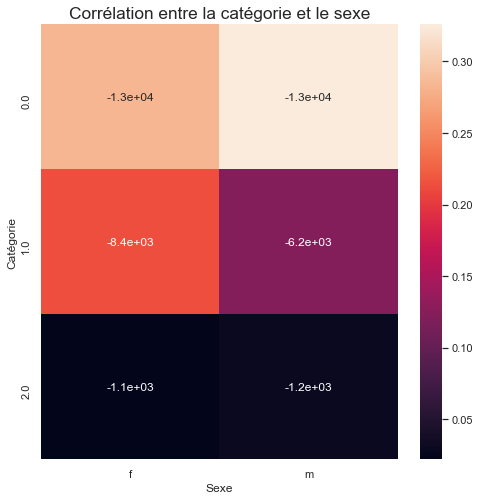

In [110]:
mesure = (cs-indep)**2/indep
xi_n = mesure.sum().sum()

plt.figure(figsize=(8,8))
sns.heatmap(mesure/xi_n, annot=indep - cs)
plt.title("Corrélation entre la catégorie et le sexe", fontsize = 'x-large')
plt.xlabel("Sexe")
plt.ylabel("Catégorie")
plt.show()

#plt.savefig("correlation_cat_sexe.jpeg", format="jpeg")

Il y a une incidence moyenne du sexe sur la catégorie concernant la catégorie 0(plus forte pour les hommes que pour les femmes), une incidence faible concernant la catégorie 1(plus forte pour les femmes que pour les hommes), et une incidence très faible concernant la catégorie 2(identique pour les hommes et les femmes).

### test du Chi 2

Conditions

Le test de normalité ne fait pas partie des conditions du Chi-2, vu qu'on ne mesure pas la normalité que sur des variables quantitatives.

On doit malgré tout valider 2 conditions :

au moins 1 valeur dans chaque cellule de la table de contingence
au moins 80% des valeurs égales ou supérieures à 5
Ces conditions étant remplies, la p-value confirme l'hypothèse 0, et l'absence corrélation entre les catégories et le sexe.

In [111]:
# Test de Chi 2

table = pd.crosstab(df['categ'], df['sex'], margins=False)
stat, p, dof, expected = st.chi2_contingency(table)
print('Test de Chi 2 (2 catégorielles)')
print('Stat = %.3f\np-value = %.35f' % (stat, p))
if p > .05:
    print('H0: les valeurs sont independantes')
else:
    print('H1: Il y a une dépendance entre les deux valeurs.')
print('\nConditions :\n'
      '- Les observations utilisées dans le calcul de la table de contingences sont indépendantes.',
      '\n- 25 exemples ou plus dans chaque cellule de la table de contingence.')

Test de Chi 2 (2 catégorielles)
Stat = 20.200
p-value = 0.00004107598563148471578062789766328
H1: Il y a une dépendance entre les deux valeurs.

Conditions :
- Les observations utilisées dans le calcul de la table de contingences sont indépendantes. 
- 25 exemples ou plus dans chaque cellule de la table de contingence.


### Corrélation âge des clients et montant total des achats

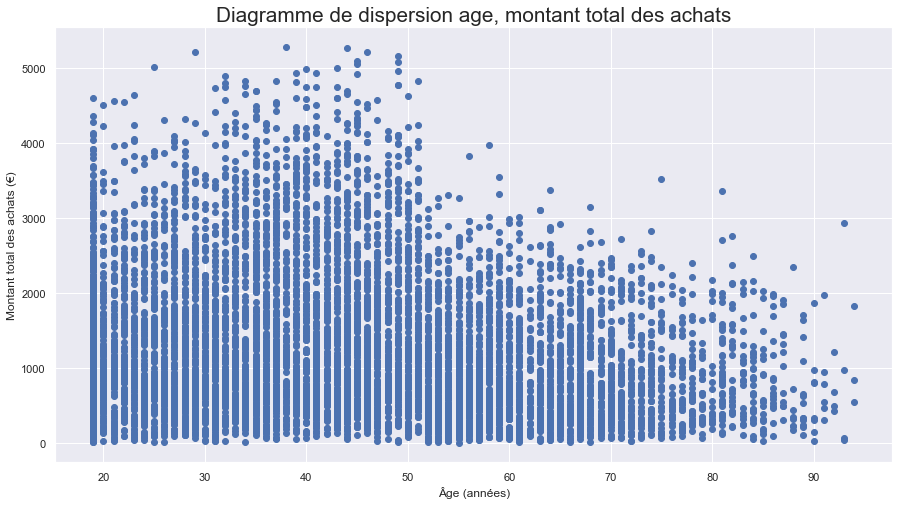

In [112]:
#Corrélation âge des clients et montant total des achats

# Groupby sur l'id_client pour avoir le montant total de leurs achats
df_montant_clients = df.groupby(["client_id", "age"]).agg({"price": "sum"})
df_montant_clients = df_montant_clients
df_montant_clients = pd.DataFrame(df_montant_clients)
df_montant_clients.reset_index(inplace=True)

# Diagramme de dispersion
X = df_montant_clients["age"]
y = df_montant_clients["price"]

plt.figure(figsize=(15,8))
plt.scatter (X,y)
plt.title("Diagramme de dispersion age, montant total des achats", fontsize="xx-large")
plt.xlabel("Âge (années)")
plt.ylabel("Montant total des achats (€)")
plt.show()



In [113]:
# Calcul du coefficient de Pearson
r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : -0.1883265242332634
Sa p-value est de : 1.8592058056267108e-69


Les deux variables sont faiblement corrélées (coefficient de corrélation << 0.50)

In [114]:
# Calcul de la régression linéaire

X = df_montant_clients[["age"]]
y = df_montant_clients["price"]

X = X.assign(intercept = [1]*X.shape[0])

lr = sm.OLS(y, X).fit()
print(lr.summary2())


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.035      
Dependent Variable: price            AIC:                142043.2134
Date:               2021-10-23 10:59 BIC:                142057.3315
No. Observations:   8596             Log-Likelihood:     -71020.    
Df Model:           1                F-statistic:        316.0      
Df Residuals:       8594             Prob (F-statistic): 1.86e-69   
R-squared:          0.035            Scale:              8.7873e+05 
--------------------------------------------------------------------
                Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
age            -10.6291   0.5979 -17.7767 0.0000  -11.8012   -9.4570
intercept     1752.2939  28.5979  61.2736 0.0000 1696.2352 1808.3526
--------------------------------------------------------------------
Omnibus:             1371.454       Durbin-Watson:   

In [115]:
# Affichage de a et b, coefficients de ma droite de régression linéaire
print(lr.params)

age           -10.629111
intercept    1752.293889
dtype: float64


In [116]:
# Stockage de a et b dans les variables correspondantes
a,b = lr.params['age'], lr.params['intercept']

Text(0, 0.5, 'Montant total des achats (€)')

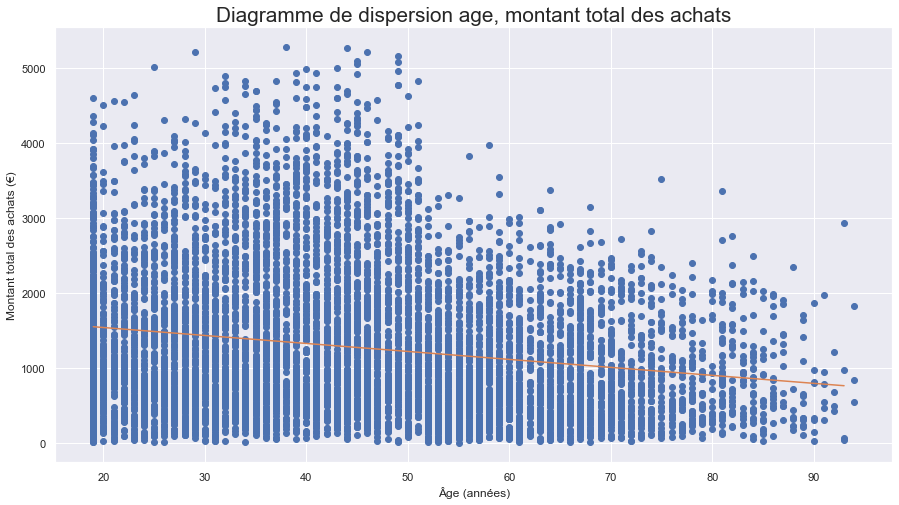

In [117]:
# Affichage du nuage de points avec la droite de régression linéaire
X = df_montant_clients['age']
y = df_montant_clients['price']
plt.figure(figsize=(15,8))
plt.plot(X, y, "o")
plt.plot(np.arange(min(X), max(X)), [a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion age, montant total des achats",  fontsize = 'xx-large')
plt.xlabel("Âge (années)")
plt.ylabel("Montant total des achats (€)")

#plt.savefig("dispersion_age_achat.jpeg", format="jpeg")

la régression linéaire n'est pas adaptée.

Le graphe fait distinctement apparaître trois catégories d'âge qui ont des comportements différents. Il faut séparer les âges en ces trois catégories, et réétudier les trois paramètres (montant total, fréquence d'achat, panier moyen) avec une ANOVA.

On crée trois catégories d'âge


In [118]:
# Création de trois catégories d'âge dans les deux df principaux

categ_age = []

for row in df.age:
    if row > 50:
        categ_age.append(">50")
    elif row > 30:
        categ_age.append("30-50")
    elif row > 18:
        categ_age.append("19-29")
    else:
        categ_age.append(np.NaN)

df['categ_age'] = categ_age

categ_age_commandes = []

for row in df_commandes.age:
    if row > 50:
        categ_age_commandes.append(">50")
    elif row > 30:
        categ_age_commandes.append("30-50")
    elif row > 18:
        categ_age_commandes.append("19-29")
    else:
        categ_age_commandes.append(np.NaN)

df_commandes['categ_age'] = categ_age_commandes

In [119]:
# Tri des âges par ordre croissant (sinon ils ils s'affichent dans n'importe quel ordre)

categ_age_order = CategoricalDtype(["19-29", "30-50", ">50"], ordered = True)
df.categ_age = df.categ_age.astype(categ_age_order)
df.sort_values("categ_age", inplace=True)
df_commandes.categ_age = df_commandes.categ_age.astype(categ_age_order)
df_commandes.sort_values("categ_age", inplace=True)

In [120]:
# Groupby sur l'id_client pour avoir le montant total de leurs achats
df_montant_clients = df.groupby(["client_id", "categ_age"], observed = True).agg({"price": "sum"})
df_montant_clients = df_montant_clients
df_montant_clients = pd.DataFrame(df_montant_clients)
df_montant_clients.reset_index(inplace=True)

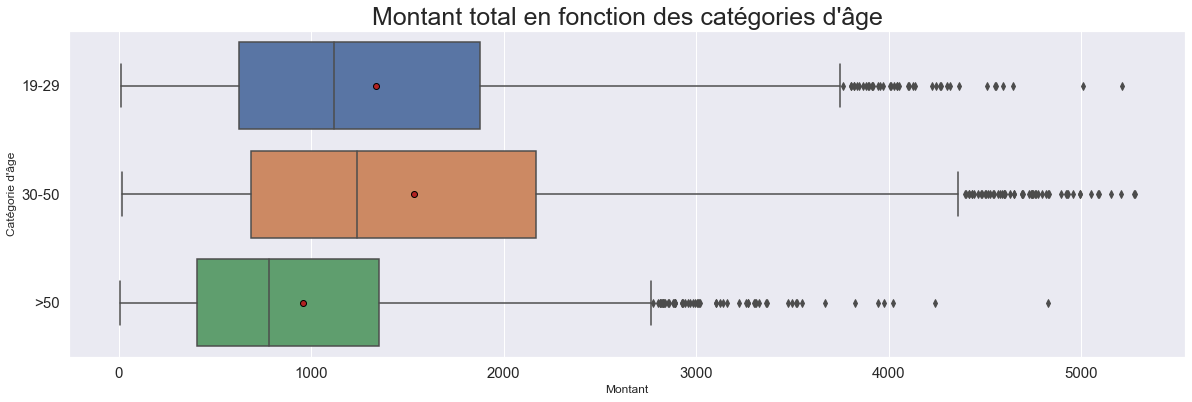

In [121]:
# Modélisation des boxplots

X = "price"
Y = "categ_age" 

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(20, 6))
sns.boxplot(x=df_montant_clients[X], y=df_montant_clients[Y], showmeans=True, meanprops=meanprops, orient="h")
plt.title("Montant total en fonction des catégories d'âge", fontsize = '25')
plt.xlabel("Montant")
plt.ylabel("Catégorie d'âge")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#plt.savefig("montant_cat_age.jpeg", format="jpeg")

In [122]:
# Calcul de l'ANOVA

from statsmodels.formula.api import ols

linear_model = ols('price ~ C(categ_age)', data=df_montant_clients).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                    sum_sq      df           F         PR(>F)
C(categ_age)  5.562237e+08     2.0  328.576599  3.121229e-138
Residual      7.273237e+09  8593.0         NaN            NaN


In [123]:
pvalue = linear_model.f_pvalue
print('Ici la p-value est égale à {}'.format(pvalue))

Ici la p-value est égale à 3.1212293265562816e-138


In [124]:
import math
rsquared = math.sqrt(linear_model.rsquared)
print('Ici le coefficient de corrélation est égal à {}'.format(rsquared))

Ici le coefficient de corrélation est égal à 0.26653782543388915


In [125]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.071      
Dependent Variable:     price              AIC:                  141722.1663
Date:                   2021-10-23 10:59   BIC:                  141743.3435
No. Observations:       8596               Log-Likelihood:       -70858.    
Df Model:               2                  F-statistic:          328.6      
Df Residuals:           8593               Prob (F-statistic):   3.12e-138  
R-squared:              0.071              Scale:                8.4641e+05 
----------------------------------------------------------------------------
                        Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
----------------------------------------------------------------------------
Intercept             1334.1835  20.1725  66.1387 0.0000 1294.6405 1373.7264
C(categ_age)[T.30-50]  200.7983  25.5958   7.8450 0.0000  150.6244  250.9722
C(categ_age)[T.>50]   

In [126]:
# P-value : choix d'un seuil de probabilité standard, de 5%
seuil = 0.05

# Coeff de corrélation : A partir du tableau d'interprétation de Cohen (https://en.wikipedia.org/wiki/Effect_size),
# se dégagent trois seuils selon l'importance de la corrélation
correl_petit = 0.1
correl_moyen = 0.3
correl_grand = 0.5

In [127]:
seuil = 0.05

#Conclusion

if pvalue < seuil:
    if rsquared > correl_grand:
        print("On rejette HO : il y a une corrélation forte entre le montant total des achats et la catégorie d'âge.")
    elif rsquared > correl_moyen:
        print("On rejette HO : il y a une corrélation moyenne entre le montant total des achats et la catégorie d'âge.")
    elif rsquared > correl_petit:
        print("On rejette HO : il y a une petite corrélation entre le montant total des achats et la catégorie d'âge.")
elif pvalue > seuil : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre le montant total des achats et la catégorie d'âge")

On rejette HO : il y a une petite corrélation entre le montant total des achats et la catégorie d'âge.


### Correlation age et fréquence d'achats

In [128]:
# Groupby sur l'id_client pour avoir le montant total de leurs achats

df_freq = df_commandes.groupby(["client_id","age"]).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)


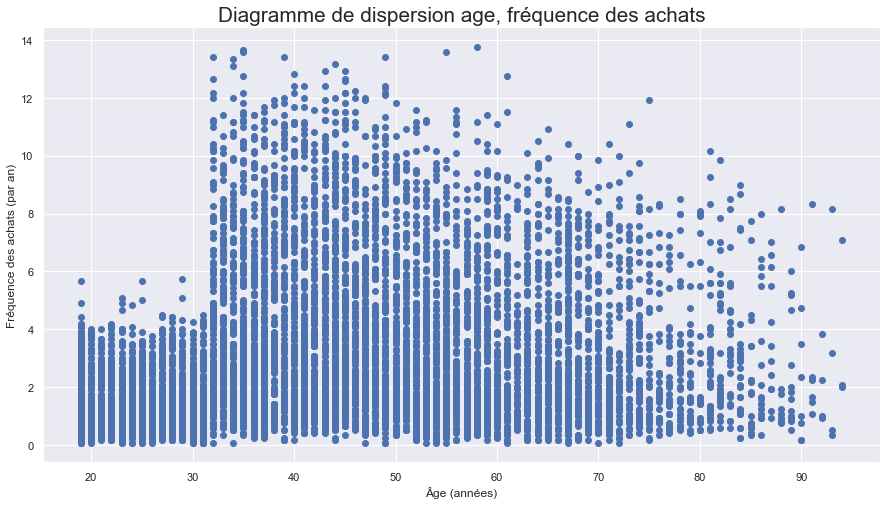

In [129]:
# Diagramme de dispersion
X = df_freq["age"]
y = df_freq["nb_achats"]

plt.figure(figsize=(15,8))
plt.scatter (X,y)

plt.title("Diagramme de dispersion age, fréquence des achats", fontsize = 'xx-large')
plt.xlabel("Âge (années)")
plt.ylabel("Fréquence des achats (par an)")
plt.show()

In [130]:
# Calcul du coefficient de Pearson

r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : 0.16460778458318384
Sa p-value est de : 2.8435326203886654e-53


Les deux variables sont faiblement corrélées (coefficient de corrélation << 0.50)

In [131]:
# Calcul de la régression linéaire
X = df_freq[["age"]]
y = df_freq["nb_achats"]

X = X.assign(intercept = [1]*X.shape[0])

lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.027     
Dependent Variable: nb_achats        AIC:                40416.4363
Date:               2021-10-23 10:59 BIC:                40430.5544
No. Observations:   8596             Log-Likelihood:     -20206.   
Df Model:           1                F-statistic:        239.3     
Df Residuals:       8594             Prob (F-statistic): 2.84e-53  
R-squared:          0.027            Scale:              6.4473    
---------------------------------------------------------------------
               Coef.    Std.Err.      t      P>|t|    [0.025   0.975]
---------------------------------------------------------------------
age            0.0251     0.0016   15.4708   0.0000   0.0219   0.0282
intercept      1.9742     0.0775   25.4851   0.0000   1.8223   2.1260
-------------------------------------------------------------------
Omnibus:              1859.362      Durbin-Watson:      

In [132]:
# Affichage de a et b, coefficients de ma droite de régression linéaire
print(lr.params)

age          0.025057
intercept    1.974157
dtype: float64


In [133]:
# Stockage de a et b dans les variables correspondantes
a,b = lr.params['age'], lr.params['intercept']

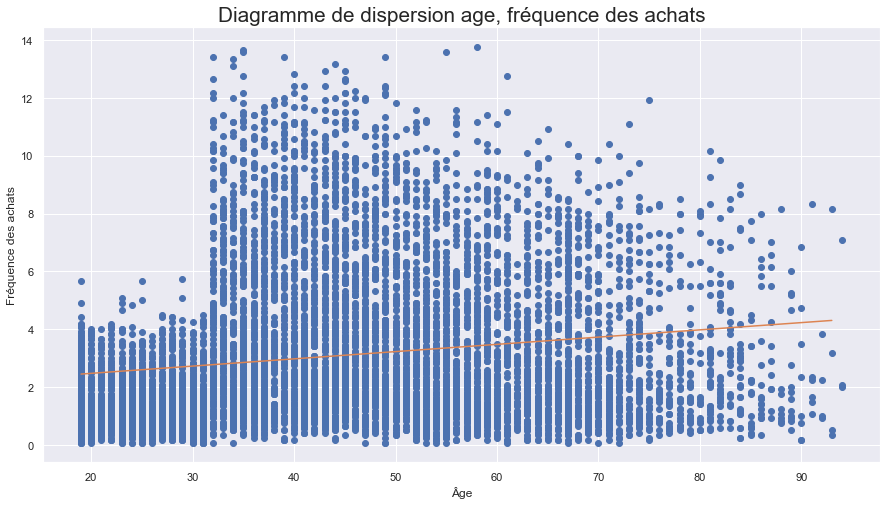

In [134]:
# Affichage du nuage de points avec la droite de régression linéaire
X = df_freq['age']
y = df_freq['nb_achats']
plt.figure(figsize=(15,8))
plt.plot(X, y, "o")
plt.plot(np.arange(min(X), max(X)), [a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion age, fréquence des achats", fontsize = 'xx-large')
plt.xlabel("Âge")
plt.ylabel("Fréquence des achats")
plt.show()

#plt.savefig("dispertion_age_achat.jpeg", format="jpeg")

La régression linéaire n'est pas adaptée, il faut faire une ANOVA.

In [135]:
# Groupby sur l'id_client pour avoir la fréquence d'achat

df_freq = df_commandes.groupby(["client_id","categ_age"], observed = True).agg({"session_id": "count"})
df_freq = pd.DataFrame(df_freq)
df_freq = df_freq.rename(columns={"session_id":"nb_achats"})

nb_mois_annee = 12
df_freq.nb_achats = df_freq.nb_achats/nb_mois_annee
df_freq.reset_index(inplace=True)

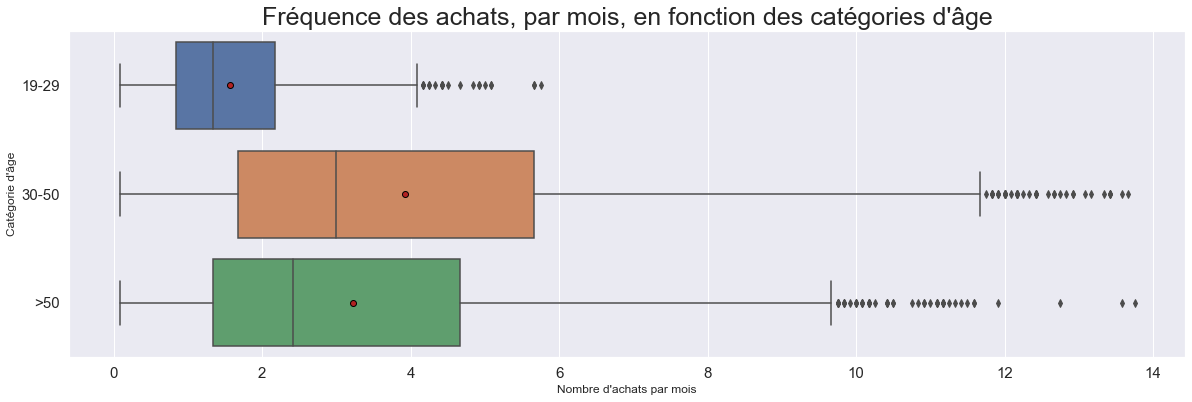

In [136]:
# Modélisation des boxplots

X = "nb_achats" 
Y = "categ_age"

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(20, 6))
sns.boxplot(x=df_freq[X], y=df_freq[Y], showmeans=True, meanprops=meanprops, orient="h")
plt.title("Fréquence des achats, par mois, en fonction des catégories d'âge", fontsize = '25')
plt.xlabel("Nombre d'achats par mois")
plt.ylabel("Catégorie d'âge")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#plt.savefig("frequence_achat_mois_categorie_age.jpeg", format="jpeg")

In [137]:
# Calcul de l'ANOVA

linear_model = ols('nb_achats ~ C(categ_age)', data=df_freq).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                    sum_sq      df           F         PR(>F)
C(categ_age)   7264.064550     2.0  628.130109  2.480654e-255
Residual      49687.242961  8593.0         NaN            NaN


In [138]:
pvalue = linear_model.f_pvalue
print('Ici la p-value est égale à {}'.format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print('Ici le coefficient de corrélation est égal à {}'.format(rsquared))

Ici la p-value est égale à 2.4806543550600497e-255
Ici le coefficient de corrélation est égal à 0.35713959167912895


In [139]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.127     
Dependent Variable: nb_achats        AIC:                39481.6541
Date:               2021-10-23 10:59 BIC:                39502.8313
No. Observations:   8596             Log-Likelihood:     -19738.   
Df Model:           2                F-statistic:        628.1     
Df Residuals:       8593             Prob (F-statistic): 2.48e-255 
R-squared:          0.128            Scale:              5.7823    
-------------------------------------------------------------------
                       Coef.  Std.Err.    t    P>|t|  [0.025 0.975]
-------------------------------------------------------------------
Intercept              1.5613   0.0527 29.6127 0.0000 1.4580 1.6647
C(categ_age)[T.30-50]  2.3596   0.0669 35.2709 0.0000 2.2285 2.4908
C(categ_age)[T.>50]    1.6544   0.0681 24.2832 0.0000 1.5209 1.7879
------------------------------------------------------------------

In [140]:
seuil = 0.05

#Conclusion

if pvalue < seuil:
    if rsquared > correl_grand:
        print("On rejette HO : il y a une corrélation forte entre la fréquence des achats et la catégorie d'âge.")
    elif rsquared > correl_moyen:
        print("On rejette HO : il y a une corrélation moyenne entre la fréquence des achats et la catégorie d'âge.")
    elif rsquared > correl_petit:
        print("On rejette HO : il y a une petite corrélation entre la fréquence des achatset la catégorie d'âge.")
elif pvalue > seuil : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre la fréquence des achats et la catégorie d'âge")

On rejette HO : il y a une corrélation moyenne entre la fréquence des achats et la catégorie d'âge.


### Correlation Taille du panier moyen  et l'age

In [141]:
# Groupby sur l'age pour avoir le nombre d'achats moyen par panier

df_panier_moyen = df_commandes.groupby(['client_id',"age"]).agg({"number_items": "mean"})
df_panier_moyen = pd.DataFrame(df_panier_moyen)
df_panier_moyen = df_panier_moyen.rename(columns={"number_items": "panier_moyen"})

df_panier_moyen.reset_index(inplace=True)

Text(0, 0.5, 'Panier moyen (articles)')

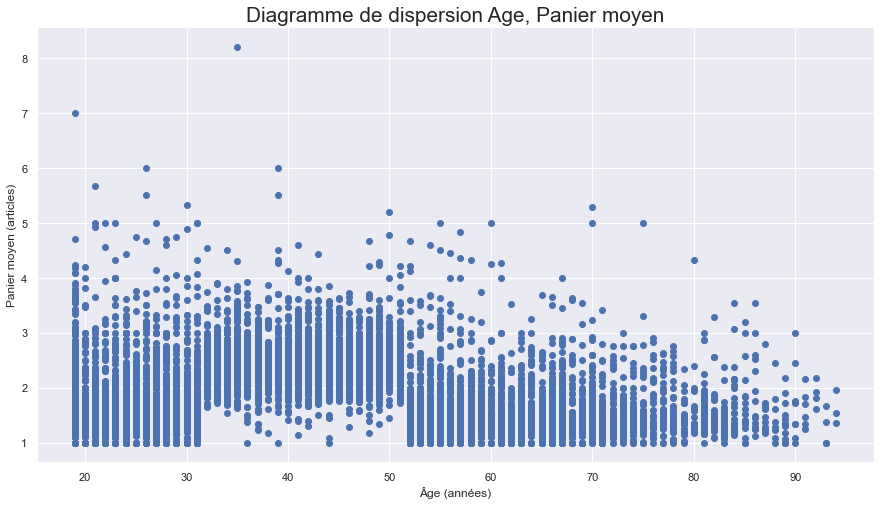

In [142]:
# Diagramme de dispersion
X = df_panier_moyen["age"]
y = df_panier_moyen["panier_moyen"]

plt.figure(figsize=(15,8))
plt.scatter (X,y)

plt.title("Diagramme de dispersion Age, Panier moyen", fontsize = 'xx-large')
plt.xlabel("Âge (années)")
plt.ylabel("Panier moyen (articles)")

In [143]:
# Calcul du coefficient de Pearson

r, p_value = st.pearsonr(X, y)
print("Le coefficient de corrélation r est de : {}".format(r))
print("Sa p-value est de : {}".format(p_value))

Le coefficient de corrélation r est de : -0.212853340857075
Sa p-value est de : 1.2052143772617487e-88


Les deux variables sont faiblement corrélées (coefficient de corrélation << 0.50)

In [144]:
# Calcul de la régression linéaire
X = df_panier_moyen[["age"]]
y = df_panier_moyen["panier_moyen"]

X = X.assign(intercept = [1]*X.shape[0])

lr = sm.OLS(y, X).fit()
print(lr.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.045     
Dependent Variable: panier_moyen     AIC:                16994.6100
Date:               2021-10-23 10:59 BIC:                17008.7281
No. Observations:   8596             Log-Likelihood:     -8495.3   
Df Model:           1                F-statistic:        407.8     
Df Residuals:       8594             Prob (F-statistic): 1.21e-88  
R-squared:          0.045            Scale:              0.42271   
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
age            -0.0084    0.0004  -20.1951  0.0000  -0.0092  -0.0076
intercept       2.3545    0.0198  118.7040  0.0000   2.3156   2.3933
-------------------------------------------------------------------
Omnibus:              1450.041      Durbin-Watson:         2.

In [145]:
# Affichage de a et b, coefficients de ma droite de régression linéaire
print(lr.params)

age         -0.008375
intercept    2.354466
dtype: float64


In [146]:
# Stockage de a et b dans les variables correspondantes
a,b = lr.params['age'], lr.params['intercept']

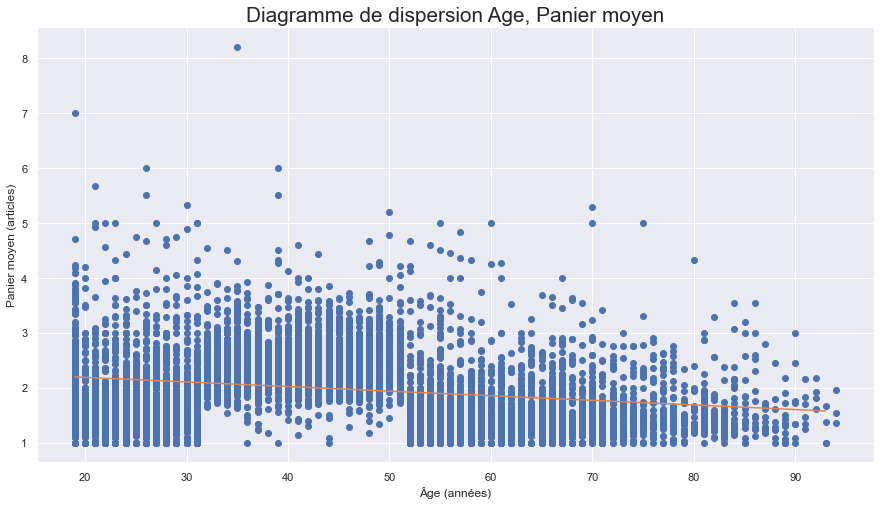

In [147]:
# Affichage du nuage de points avec la droite de régression linéaire
X = df_panier_moyen['age']
y = df_panier_moyen['panier_moyen']
plt.figure(figsize=(15,8))
plt.plot(X, y, "o")
plt.plot(np.arange(min(X), max(X)), [a*x+b for x in np.arange(min(X), max(X))])
plt.title("Diagramme de dispersion Age, Panier moyen", fontsize = 'xx-large')
plt.xlabel("Âge (années)")
plt.ylabel("Panier moyen (articles)")
plt.show()

#plt.savefig("dispersion_age_paniermoyen.jpeg", format="jpeg")

On distingue les trois catégories d'âge utilisées pour les ANOVA. On fait une ANOVA aussi.

In [148]:
# Groupby sur l'id_client pour avoir le panier moyen

df_panier_moyen = df_commandes.groupby(['client_id',"categ_age"], observed = True).agg({"number_items": "mean"})
df_panier_moyen = pd.DataFrame(df_panier_moyen)
df_panier_moyen = df_panier_moyen.rename(columns={"number_items": "panier_moyen"})

df_panier_moyen.reset_index(inplace=True)

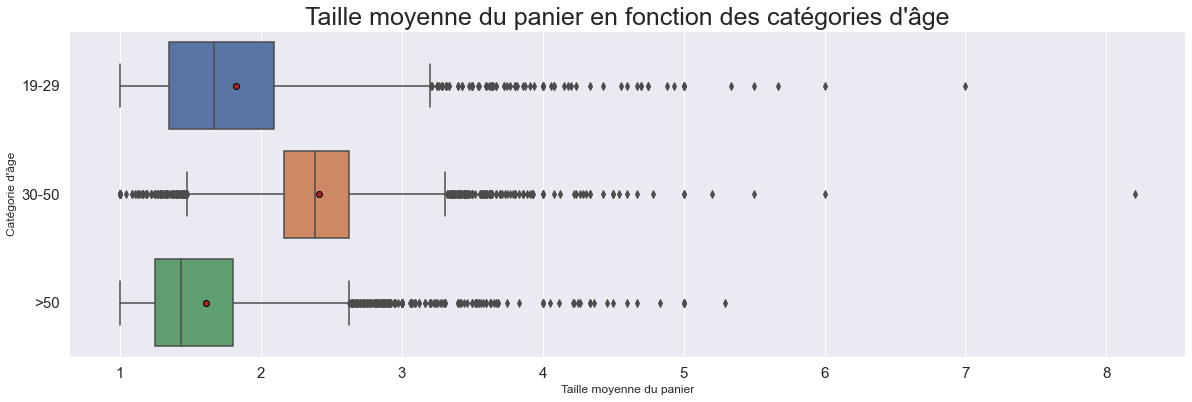

In [149]:
# Modélisation des boxplots

X = "panier_moyen" 
Y = "categ_age"

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(20, 6))
sns.boxplot(x=df_panier_moyen[X], y=df_panier_moyen[Y], showmeans=True, meanprops=meanprops, orient="h")
plt.title("Taille moyenne du panier en fonction des catégories d'âge", fontsize = '25')
plt.xlabel("Taille moyenne du panier")
plt.ylabel("Catégorie d'âge")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#plt.savefig("paniermoyen_cat_age.jpeg", format="jpeg")

In [150]:
# Calcul de l'ANOVA
df_panier_moyen.panier_moyen = df_panier_moyen.panier_moyen.astype("float64")

linear_model = ols('panier_moyen ~ C(categ_age)', data=df_panier_moyen).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                   sum_sq      df            F  PR(>F)
C(categ_age)  1111.060539     2.0  1771.902516     0.0
Residual      2694.093815  8593.0          NaN     NaN


In [151]:
pvalue = linear_model.f_pvalue
print('Ici la p-value est égale à {}'.format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print('Ici le coefficient de corrélation est égal à {}'.format(rsquared))


Ici la p-value est égale à 0.0
Ici le coefficient de corrélation est égal à 0.540359414592416


In [152]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())

                   Results: Ordinary least squares
Model:               OLS               Adj. R-squared:      0.292     
Dependent Variable:  panier_moyen      AIC:                 14427.0105
Date:                2021-10-23 10:59  BIC:                 14448.1877
No. Observations:    8596              Log-Likelihood:      -7210.5   
Df Model:            2                 F-statistic:         1772.     
Df Residuals:        8593              Prob (F-statistic):  0.00      
R-squared:           0.292             Scale:               0.31352   
----------------------------------------------------------------------
                       Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
----------------------------------------------------------------------
Intercept              1.8224   0.0123 148.4403 0.0000  1.7984  1.8465
C(categ_age)[T.30-50]  0.5894   0.0156  37.8360 0.0000  0.5589  0.6199
C(categ_age)[T.>50]   -0.2117   0.0159 -13.3437 0.0000 -0.2428 -0.1806
--------------------------

In [153]:
seuil = 0.05

#Conclusion

if pvalue < seuil:
    if rsquared > correl_grand:
        print("On rejette HO : il y a une corrélation forte entre la taille du panier moyen et la catégorie d'âge.")
    elif rsquared > correl_moyen:
        print("On rejette HO : il y a une corrélation moyenne entre la taille du panier moyen et la catégorie d'âge.")
    elif rsquared > correl_petit:
        print("On rejette HO : il y a une petite corrélation entre la taille du panier moyen et la catégorie d'âge.")
elif pvalue > seuil : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre la taille du panier moyen et la catégorie d'âge")

On rejette HO : il y a une corrélation forte entre la taille du panier moyen et la catégorie d'âge.


### Correlation de catégories de produits achetés

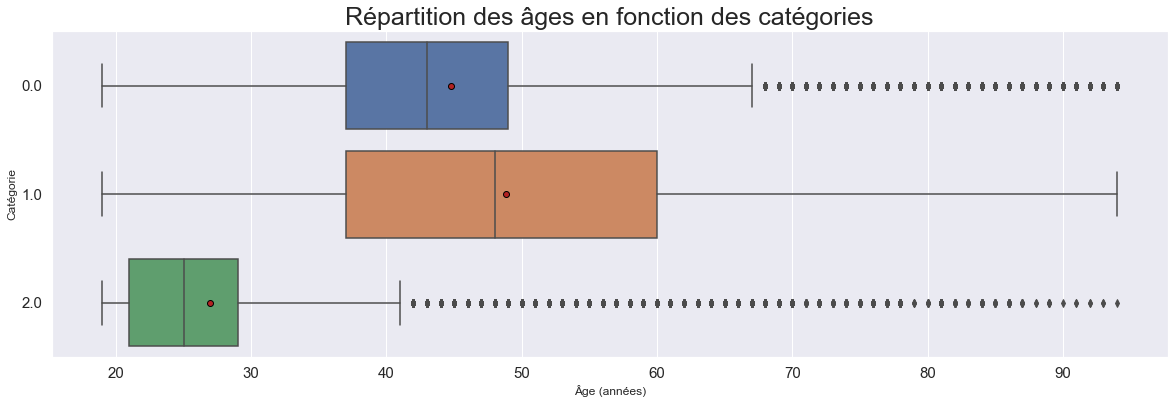

In [154]:
X = "age" # quantitative
Y = "categ" # qualitative

meanprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'firebrick'}

plt.figure(figsize=(20, 6))
plt.title("Répartition des âges en fonction des catégories", fontsize = '25')
sns.boxplot(x=df[X], y=df[Y], showmeans=True, meanprops=meanprops, orient="h")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Âge (années)")
plt.ylabel("Catégorie")
plt.show()

#plt.savefig("repartion_age_cat", format="jpeg")

In [155]:
# Je calcule une ANOVA

linear_model = ols('age ~ C(categ)', data=df).fit()
table = sm.stats.anova_lm(linear_model, typ=2)
print(table)

                sum_sq        df             F  PR(>F)
C(categ)  1.374190e+07       2.0  40411.453064     0.0
Residual  1.075723e+08  632686.0           NaN     NaN


In [156]:
pvalue = linear_model.f_pvalue
print('Ici la p-value est égale à {}'.format(pvalue))

Ici la p-value est égale à 0.0


In [157]:
# Affichage de la régression linéaire correspondante
print(linear_model.summary2())


                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.113       
Dependent Variable: age              AIC:                5044952.2187
Date:               2021-10-23 10:59 BIC:                5044986.2919
No. Observations:   632689           Log-Likelihood:     -2.5225e+06 
Df Model:           2                F-statistic:        4.041e+04   
Df Residuals:       632686           Prob (F-statistic): 0.00        
R-squared:          0.113            Scale:              170.02      
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|   [0.025   0.975] 
---------------------------------------------------------------------
Intercept         44.7946   0.0209 2138.4601 0.0000  44.7535  44.8356
C(categ)[T.1.0]    4.0083   0.0352  113.8534 0.0000   3.9393   4.0773
C(categ)[T.2.0]  -17.8291   0.0749 -237.9348 0.0000 -17.9759 -17.6822
---------------------------------------

In [158]:
pvalue = linear_model.f_pvalue
print('Ici la p-value est égale à {}'.format(pvalue))

rsquared = math.sqrt(linear_model.rsquared)
print('Ici le coefficient de corrélation est égal à {}'.format(rsquared))

Ici la p-value est égale à 0.0
Ici le coefficient de corrélation est égal à 0.3365639002963744


In [159]:
seuil = 0.05

#Conclusion
if pvalue < seuil:
    if rsquared > correl_grand:
        print("On rejette HO : il y a une corrélation forte entre la catégorie de produits et l'âge.")
    elif rsquared > correl_moyen:
        print("On rejette HO : il y a une corrélation moyenne entre la catégorie de produits et l'âge.")
    elif rsquared > correl_petit:
        print("On rejette HO : il y a une petite corrélation entre la catégorie de produits et l'âge.")
elif pvalue > seuil : 
    print("On ne peut pas rejeter HO: il n'y a pas de corrélation entre la catégorie de produits et l'âge.")

On rejette HO : il y a une corrélation moyenne entre la catégorie de produits et l'âge.


Comme on l'a fait plus haut, on complète cette étude selon l'âge par une étude selon les catégories d'âge, plus pertinente.  

On se retrouve avec deux variables qualitatives : il faut faire une heatmap.

In [160]:
# Réalisation d'une heatmap

# Tableau de contingence réel
df.categ_age=df.categ_age.astype("str")

X="categ"
Y="categ_age"
d=df[[X,Y]].pivot_table(index=X, columns=Y, aggfunc=len)
d.head(3)

categ_age,19-29,30-50,>50
categ,,,
0.0,15452,288776,83265
1.0,25863,91186,95299
2.0,27531,3759,1558


In [161]:
cont=d.copy()
tx=df[X].value_counts()
ty=df[Y].value_counts()

cont.loc[:,"Total"]=tx
cont.loc["total",:]=ty
cont.loc["total","Total"]=len(df)

cont

categ_age,19-29,30-50,>50,Total
categ,,,,
0.0,15452.0,288776.0,83265.0,387493.0
1.0,25863.0,91186.0,95299.0,212348.0
2.0,27531.0,3759.0,1558.0,32848.0
total,68846.0,383721.0,180122.0,679332.0


In [162]:
# Tableau de contingence théorique

tx = pd.DataFrame(tx)
ty = pd.DataFrame(ty)
tx.columns= ['foo']
ty.columns= ['foo']
n = len(df)
indep = tx.dot(ty.T)/n

indep.sort_index(axis=1, inplace=True)
indep.sort_index(inplace=True)
indep.drop(columns="nan", inplace=True)

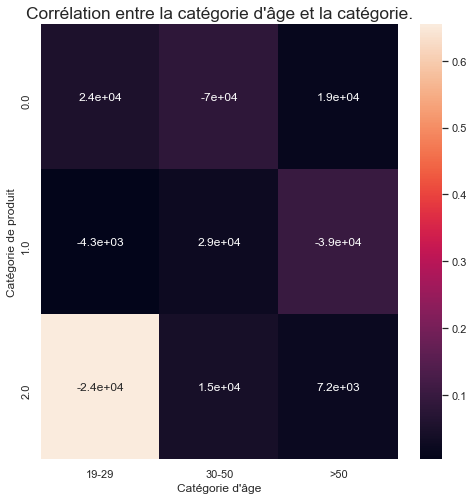

In [163]:
mesure = (d-indep)**2/indep
xi_n = mesure.sum().sum()

plt.figure(figsize=(8,8))
sns.heatmap(mesure/xi_n, annot=indep - d)
plt.title("Corrélation entre la catégorie d'âge et la catégorie.", fontsize = 'x-large')
plt.xlabel("Catégorie d'âge")
plt.ylabel("Catégorie de produit")
plt.show()

#plt.savefig("correlation_cat_age_prod.jpeg", format="jpeg")

La Catégorie d'âge est corrélée à la catégorie de produits car les jeunes achètent la catégorie 2.

La catégorie 2 est corrélée à la tranche 19-29. 

Les trois variables étudiées en fonction de l'âge ont un coefficient de Pearson très bas, de plus les modélisations montrent une répartition non linéaire. La régression linéaire n'est donc pas adaptée.  

# Probabilité

In [164]:
df.head()

,id_prod,categ,price,client_id,sex,age,session_id,date,hour,day_week,year,month,days,classe_age,categ_age
679531,1_521,1.0,22.99,c_305,f,27.0,s_135996,2021-12-18,1.0,Sam,2021.0,12.0,18.0,18-31,19-29
564673,1_392,1.0,18.11,c_1669,m,19.0,s_131104,2021-12-08,6.0,Merc,2021.0,12.0,8.0,18-31,19-29
564674,1_630,1.0,10.75,c_1669,m,19.0,s_264704,2022-09-07,17.0,Merc,2022.0,9.0,7.0,18-31,19-29
564675,2_26,2.0,42.51,c_1669,m,19.0,s_328389,2023-01-17,22.0,Mar,2023.0,1.0,17.0,18-31,19-29
564676,2_164,2.0,52.26,c_1669,m,19.0,s_281324,2022-10-12,8.0,Merc,2022.0,10.0,12.0,18-31,19-29


In [165]:
#On affiche le produit 2_159
df.loc[df['id_prod'] == '2_159']

,id_prod,categ,price,client_id,sex,age,session_id,date,hour,day_week,year,month,days,classe_age,categ_age
564405,2_159,2.0,145.99,c_3558,m,20.0,s_344167,2023-02-20,3.0,Lun,2023.0,2.0,20.0,18-31,19-29
564382,2_159,2.0,145.99,c_6651,f,21.0,s_71933,2021-08-06,2.0,Ven,2021.0,8.0,6.0,18-31,19-29
358694,2_159,2.0,145.99,c_3849,f,21.0,s_109522,2021-10-24,17.0,Dim,2021.0,10.0,24.0,18-31,19-29
574789,2_159,2.0,145.99,c_719,f,19.0,s_183213,2022-03-23,8.0,Merc,2022.0,3.0,23.0,18-31,19-29
574785,2_159,2.0,145.99,c_719,f,19.0,s_94161,2021-09-23,8.0,Jeu,2021.0,9.0,23.0,18-31,19-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533727,2_159,2.0,145.99,c_5585,m,69.0,s_757,2021-03-02,14.0,Mar,2021.0,3.0,2.0,68 et +,>50
243063,2_159,2.0,145.99,c_8519,m,77.0,s_219077,2022-06-05,9.0,Dim,2022.0,6.0,5.0,68 et +,>50
146955,2_159,2.0,145.99,c_8084,m,70.0,s_56668,2021-07-02,2.0,Ven,2021.0,7.0,2.0,68 et +,>50
387731,2_159,2.0,145.99,c_256,f,60.0,s_96214,2021-09-27,7.0,Lun,2021.0,9.0,27.0,33-67,>50


In [166]:
#On affiche le produit 0_525
df.loc[df['id_prod'] == '0_525']

,id_prod,categ,price,client_id,sex,age,session_id,date,hour,day_week,year,month,days,classe_age,categ_age
564393,0_525,0.0,2.99,c_3558,m,20.0,s_344167,2023-02-20,3.0,Lun,2023.0,2.0,20.0,18-31,19-29
564367,0_525,0.0,2.99,c_6651,f,21.0,s_71933,2021-08-06,2.0,Ven,2021.0,8.0,6.0,18-31,19-29
569431,0_525,0.0,2.99,c_2545,m,25.0,s_163833,2022-02-12,5.0,Sam,2022.0,2.0,12.0,18-31,19-29
544543,0_525,0.0,2.99,c_7570,m,29.0,s_90408,2021-09-15,19.0,Merc,2021.0,9.0,15.0,18-31,19-29
126278,0_525,0.0,2.99,c_6158,m,19.0,s_265608,2022-09-09,16.0,Ven,2022.0,9.0,9.0,18-31,19-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533693,0_525,0.0,2.99,c_5585,m,69.0,s_757,2021-03-02,14.0,Mar,2021.0,3.0,2.0,68 et +,>50
243060,0_525,0.0,2.99,c_8519,m,77.0,s_219077,2022-06-05,9.0,Dim,2022.0,6.0,5.0,68 et +,>50
146951,0_525,0.0,2.99,c_8084,m,70.0,s_56668,2021-07-02,2.0,Ven,2021.0,7.0,2.0,68 et +,>50
387709,0_525,0.0,2.99,c_256,f,60.0,s_96214,2021-09-27,7.0,Lun,2021.0,9.0,27.0,33-67,>50


In [167]:
df_2_159 = df[df['id_prod'] == '2_159'] #On selectionne toutes les références 2_159
df_0_525 = df[df['id_prod'] == '0_525'] #On selectionne toutes les références 0_525
df_2_159 =df_2_159['client_id'].drop_duplicates() #On selectionne les clients unique de la référence 2_159
df_0_525 =df_0_525['client_id'].drop_duplicates() #On selectionne les clients unique de la référence 0_525
nb_client_commun = len(df_0_525.isin(df_2_159)) #On selectionne les clients unique qui ont commandés les deux références
proba=(nb_client_commun/len(df_2_159))*100  #On calcul la probabilité
#On affiche la probabilité
print("La Probabilité qu'un client achète la référence 0_525 sachant qu'il a acheté la référence 2_159 est de:",proba,"%" )

La Probabilité qu'un client achète la référence 0_525 sachant qu'il a acheté la référence 2_159 est de: 86.50190114068441 %
